Phase 1: Data Preparation & EDA

In [ ]:
!pip install -q seaborn plotly kaleido scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set figure quality
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [ ]:
# Upload the CSV file
from google.colab import files
print("📂 Please upload the HepatitisCdata.csv file...")
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('HepatitisCdata.csv')

print("📊 DATASET LOADED SUCCESSFULLY!")

📂 Please upload the HepatitisCdata.csv file...


Saving HepatitisCdata.csv to HepatitisCdata (1).csv
📊 DATASET LOADED SUCCESSFULLY!


In [ ]:
print("\n DATASET OVERVIEW")

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n First 10 Rows:")
display(df.head(10))

print("\n Dataset Info:")
df.info()

print("\n Statistical Summary:")
display(df.describe().round(2))

print("\n Column Names:")
print(df.columns.tolist())


 DATASET OVERVIEW
Dataset Shape: 615 rows × 14 columns
Memory Usage: 124.95 KB

 First 10 Rows:


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB

 Statistical Summary:


,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.00,615.00,614.00,597.00,614.00,615.00,615.00,615.00,605.00,615.00,615.00,614.00
mean,308.00,47.41,41.62,68.28,28.45,34.79,11.40,8.20,5.37,81.29,39.53,72.04
std,177.68,10.06,5.78,26.03,25.47,33.09,19.67,2.21,1.13,49.76,54.66,5.40
min,1.00,19.00,14.90,11.30,0.90,10.60,0.80,1.42,1.43,8.00,4.50,44.80
25%,154.50,39.00,38.80,52.50,16.40,21.60,5.30,6.94,4.61,67.00,15.70,69.30
50%,308.00,47.00,41.95,66.20,23.00,25.90,7.30,8.26,5.30,77.00,23.30,72.20
75%,461.50,54.00,45.20,80.10,33.08,32.90,11.20,9.59,6.06,88.00,40.20,75.40
max,615.00,77.00,82.20,416.60,325.30,324.00,254.00,16.41,9.67,1079.10,650.90,90.00



 Column Names:
['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']



🎯 TARGET VARIABLE ANALYSIS: 'Category'

📊 Class Distribution:
Category
0=Blood Donor             533
0s=suspect Blood Donor      7
1=Hepatitis                24
2=Fibrosis                 21
3=Cirrhosis                30
Name: count, dtype: int64

📊 Class Percentages:
0=Blood Donor: 86.67%
0s=suspect Blood Donor: 1.14%
1=Hepatitis: 3.90%
2=Fibrosis: 3.41%
3=Cirrhosis: 4.88%


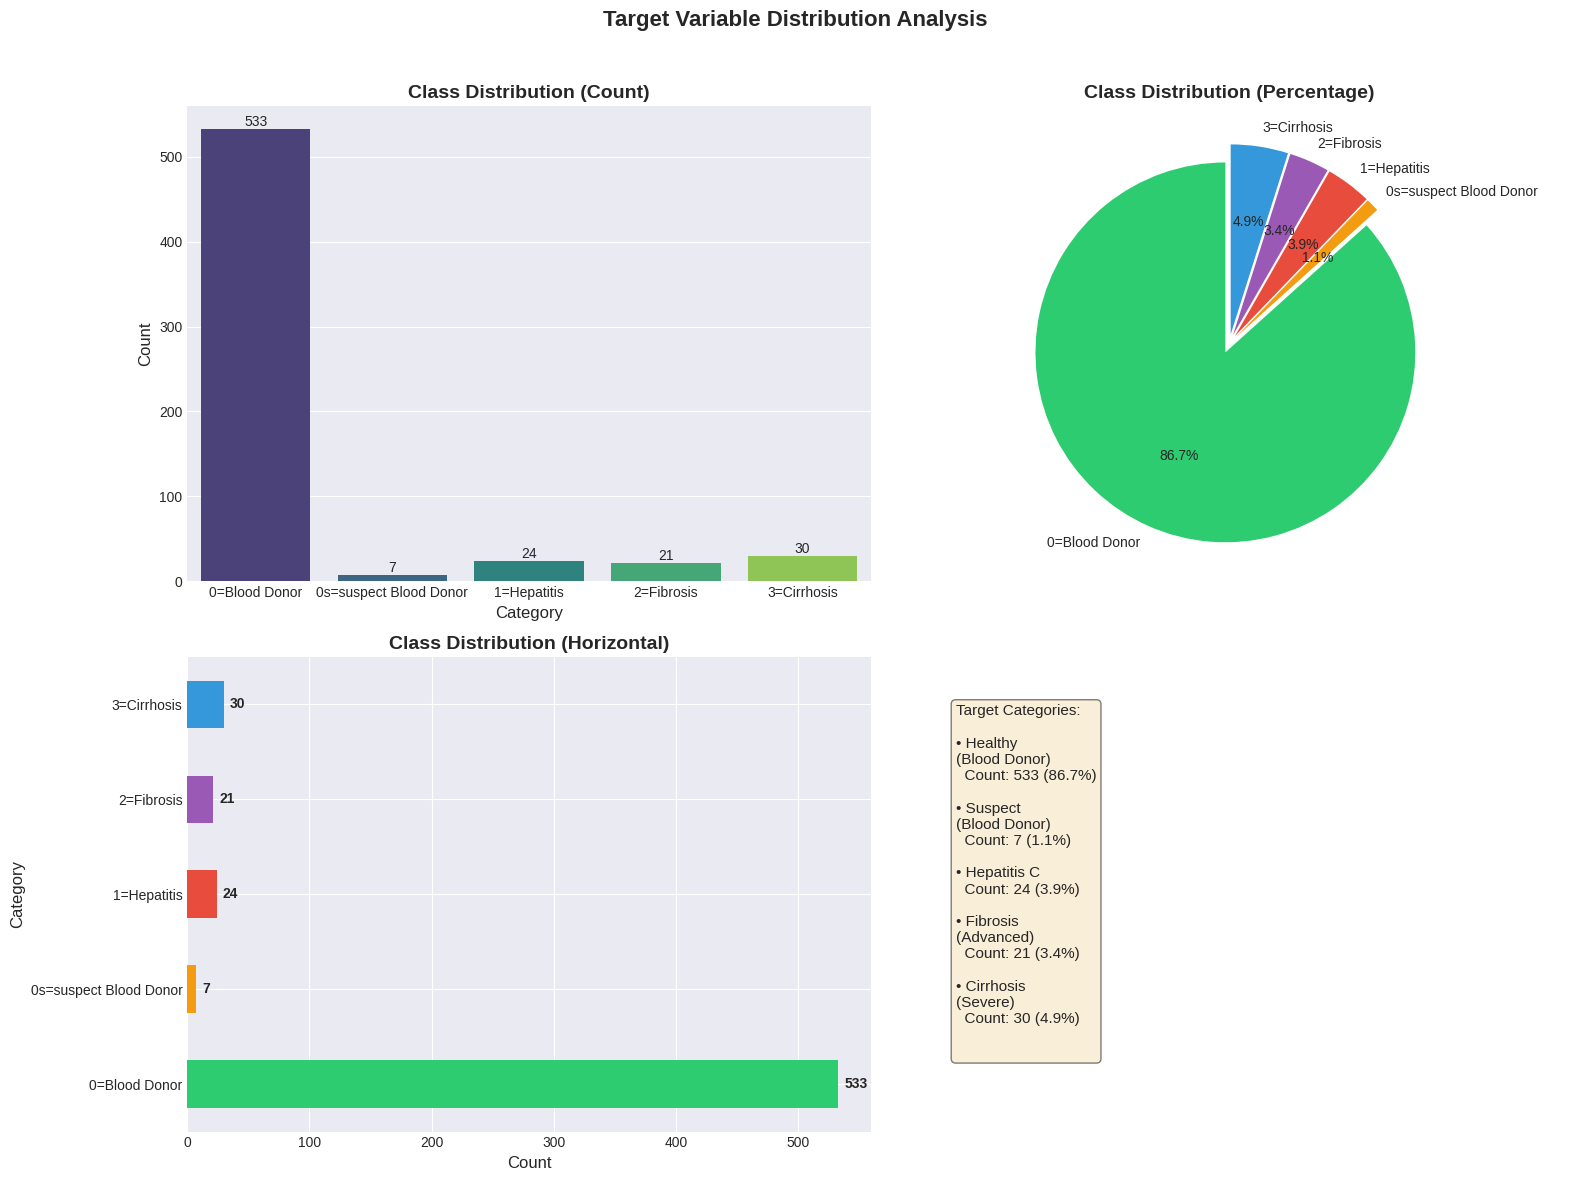

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# ───────────────────────────────────────────────────────────────
print("\n" + "=" * 80)
print("🎯 TARGET VARIABLE ANALYSIS: 'Category'")
print("=" * 80)

print("\n📊 Class Distribution:")
class_counts = df['Category'].value_counts().sort_index()
print(class_counts)

print("\n📊 Class Percentages:")
class_percentages = (df['Category'].value_counts(normalize=True) * 100).sort_index()
for category, percentage in class_percentages.items():
    print(f"{category}: {percentage:.2f}%")

# ───────────────────────────────────────────────────────────────
# Visualization 1: Target Distribution (Multiple Styles)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Target Variable Distribution Analysis', fontsize=16, fontweight='bold')

# 1.1 Count Plot
sns.countplot(data=df, x='Category', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Category', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container)

# 1.2 Pie Chart
colors = ['#2ecc71', '#f39c12', '#e74c3c', '#9b59b6', '#3498db']  # Added extra color
explode = [0.05] * len(class_counts)  # Match explode length to number of classes

axes[0, 1].pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(class_counts)],
    explode=explode
)
axes[0, 1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

# 1.3 Horizontal Bar Chart
class_counts.plot(kind='barh', ax=axes[1, 0], color=colors[:len(class_counts)])
axes[1, 0].set_title('Class Distribution (Horizontal)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Count', fontsize=12)
axes[1, 0].set_ylabel('Category', fontsize=12)
for i, v in enumerate(class_counts):
    axes[1, 0].text(v + 5, i, str(v), va='center', fontweight='bold')

# 1.4 Categorical explanation box
category_names = {
    '0=Blood Donor': 'Healthy\n(Blood Donor)',
    '0s=suspect Blood Donor': 'Suspect\n(Blood Donor)',
    '1=Hepatitis': 'Hepatitis C',
    '2=Fibrosis': 'Fibrosis\n(Advanced)',
    '3=Cirrhosis': 'Cirrhosis\n(Severe)'
}
axes[1, 1].axis('off')

info_text = "Target Categories:\n\n"
for cat, count in class_counts.items():
    name = category_names.get(cat, cat)
    info_text += f"• {name}\n  Count: {count} ({class_percentages[cat]:.1f}%)\n\n"

axes[1, 1].text(
    0.1, 0.9, info_text,
    transform=axes[1, 1].transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
)

# Adjust layout and show
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ───────────────────────────────────────────────────────────────
# Interactive Plotly Version
fig_plotly = go.Figure()
fig_plotly.add_trace(go.Bar(
    x=class_counts.index,
    y=class_counts.values,
    marker_color=colors[:len(class_counts)],
    text=class_counts.values,
    textposition='auto'
))
fig_plotly.update_layout(
    title='Interactive Target Distribution',
    xaxis_title='Category',
    yaxis_title='Count',
    template='plotly_white',
    height=400
)
fig_plotly.show()


MISSING VALUES ANALYSIS

 Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
5,ALP,18,2.926829
10,CHOL,10,1.626016
6,ALT,1,0.162602
13,PROT,1,0.162602
4,ALB,1,0.162602


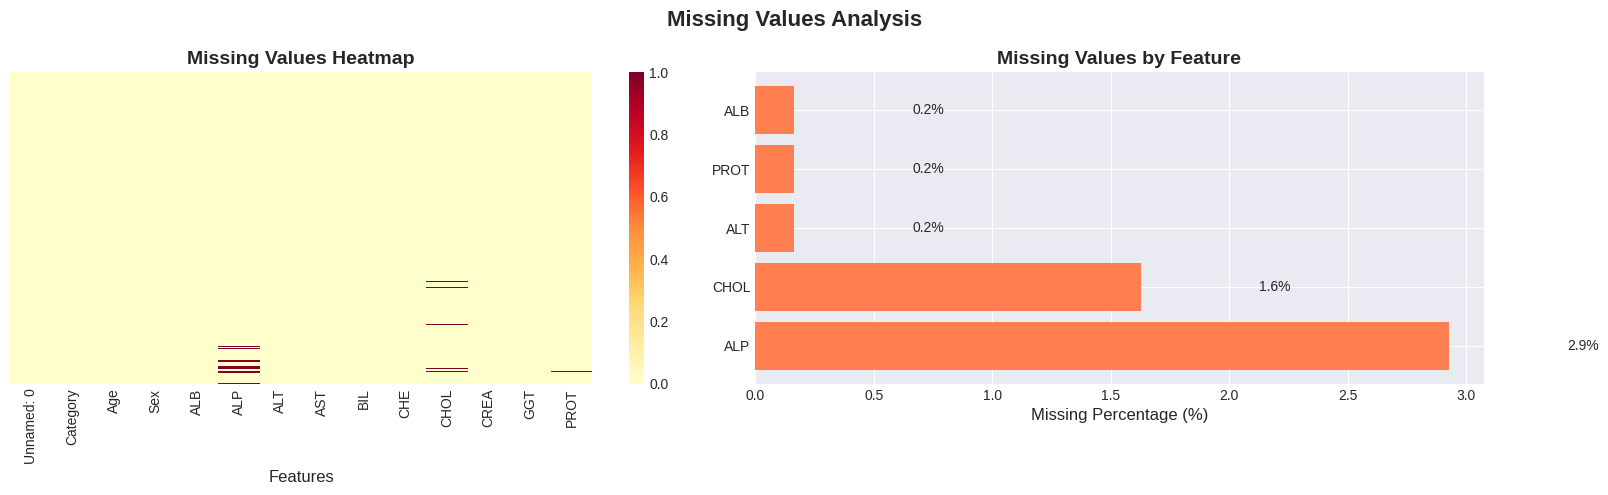

In [ ]:
# 5. MISSING VALUES ANALYSIS

print("MISSING VALUES ANALYSIS")


missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Count', ascending=False)

print("\n Missing Values Summary:")
display(missing_df[missing_df['Missing_Count'] > 0])

# Visualization 2: Missing Values
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Missing Values Analysis', fontsize=16, fontweight='bold')

# 2.1 Missing Values Heatmap
sns.heatmap(df.isnull(), cbar=True, cmap='YlOrRd', ax=axes[0], yticklabels=False)
axes[0].set_title('Missing Values Heatmap', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Features', fontsize=12)

# 2.2 Missing Values Bar Chart
missing_data = missing_df[missing_df['Missing_Count'] > 0]
if len(missing_data) > 0:
    axes[1].barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    axes[1].set_xlabel('Missing Percentage (%)', fontsize=12)
    axes[1].set_title('Missing Values by Feature', fontsize=14, fontweight='bold')
    for i, v in enumerate(missing_data['Missing_Percentage']):
        axes[1].text(v + 0.5, i, f'{v:.1f}%', va='center')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values!', ha='center', va='center',
                 fontsize=20, fontweight='bold', color='green')
    axes[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#6. HANDLE MISSING VALUES

print("\n" + "=" * 80)
print("🔧 HANDLING MISSING VALUES")
print("=" * 80)

# Strategy: Median imputation for numerical features
print("\n Strategy: Median imputation for numerical features")

# Identify numerical columns (exclude ID and categorical)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

print(f"\nNumerical columns: {numerical_cols}")

# Store original missing count
original_missing = df.isnull().sum().sum()

# Impute missing values with median
for col in numerical_cols:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"✅ Imputed {col} with median: {median_value:.2f}")

# Verify no missing values remain
final_missing = df.isnull().sum().sum()
print(f"\n✅ Missing values before: {original_missing}")
print(f"✅ Missing values after: {final_missing}")


🔧 HANDLING MISSING VALUES

 Strategy: Median imputation for numerical features

Numerical columns: ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
✅ Imputed ALB with median: 41.95
✅ Imputed ALP with median: 66.20
✅ Imputed ALT with median: 23.00
✅ Imputed CHOL with median: 5.30
✅ Imputed PROT with median: 72.20

✅ Missing values before: 31
✅ Missing values after: 0


ENCODING CATEGORICAL VARIABLES

📝 Encoding 'Sex' column...
Original values: ['m' 'f']
Encoded values: Male(m)=1, Female(f)=0
✅ Sex encoded successfully!

 Sex Distribution:
Sex
m    377
f    238
Name: count, dtype: int64


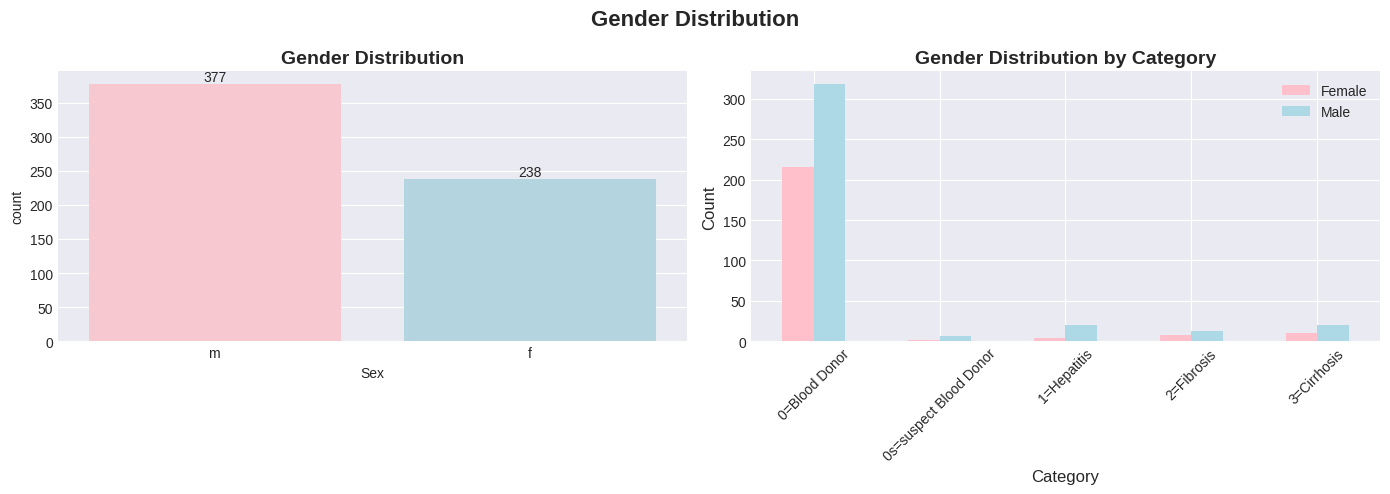

In [ ]:
# 7. ENCODE CATEGORICAL VARIABLES

print("ENCODING CATEGORICAL VARIABLES")

# 7.1 Encode Sex (m=1, f=0)
print("\n📝 Encoding 'Sex' column...")
print(f"Original values: {df['Sex'].unique()}")
df['Sex_Encoded'] = df['Sex'].map({'m': 1, 'f': 0})
print(f"Encoded values: Male(m)=1, Female(f)=0")
print(f"✅ Sex encoded successfully!")

# Show distribution
print("\n Sex Distribution:")
sex_dist = df['Sex'].value_counts()
print(sex_dist)

# Visualization 3: Sex Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Gender Distribution', fontsize=16, fontweight='bold')

sns.countplot(data=df, x='Sex', ax=axes[0], palette=['pink', 'lightblue'])
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Sex by Category
sex_category = pd.crosstab(df['Category'], df['Sex'])
sex_category.plot(kind='bar', ax=axes[1], color=['pink', 'lightblue'])
axes[1].set_title('Gender Distribution by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(['Female', 'Male'])
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

 CREATING BINARY CLASSIFICATION TARGET

 Transformation:
   Healthy (0, 0s) → 0
   Diseased (1, 2, 3) → 1

 Binary Target Distribution:
Healthy (0): 540 (87.8%)
Diseased (1): 75 (12.2%)


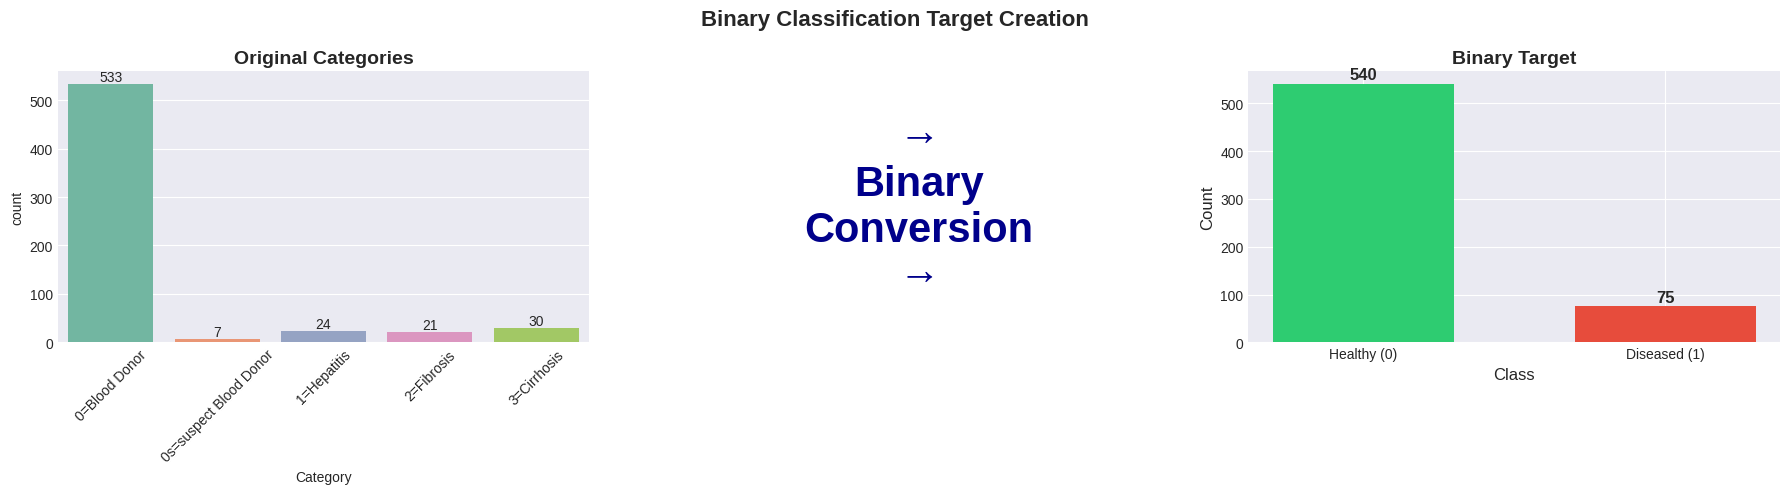

In [ ]:
# 8. CREATE BINARY CLASSIFICATION

print(" CREATING BINARY CLASSIFICATION TARGET")


print("\n Transformation:")
print("   Healthy (0, 0s) → 0")
print("   Diseased (1, 2, 3) → 1")

# Create binary target
df['Binary_Target'] = df['Category'].apply(
    lambda x: 0 if x in ['0=Blood Donor', '0s=suspect Blood Donor'] else 1
)

print("\n Binary Target Distribution:")
binary_counts = df['Binary_Target'].value_counts().sort_index()
print(f"Healthy (0): {binary_counts[0]} ({binary_counts[0]/len(df)*100:.1f}%)")
print(f"Diseased (1): {binary_counts[1]} ({binary_counts[1]/len(df)*100:.1f}%)")

# Visualization 4: Binary Classification
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Binary Classification Target Creation', fontsize=16, fontweight='bold')

# Original categories
sns.countplot(data=df, x='Category', ax=axes[0], palette='Set2')
axes[0].set_title('Original Categories', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Arrow visualization
axes[1].text(0.5, 0.5, '→\nBinary\nConversion\n→', ha='center', va='center',
             fontsize=30, fontweight='bold', color='darkblue')
axes[1].axis('off')

# Binary target
labels = ['Healthy (0)', 'Diseased (1)']
colors_binary = ['#2ecc71', '#e74c3c']
axes[2].bar([0, 1], binary_counts.values, color=colors_binary, width=0.6)
axes[2].set_title('Binary Target', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Class', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(labels)
for i, v in enumerate(binary_counts.values):
    axes[2].text(i, v + 10, str(v), ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

 FEATURE DISTRIBUTION ANALYSIS


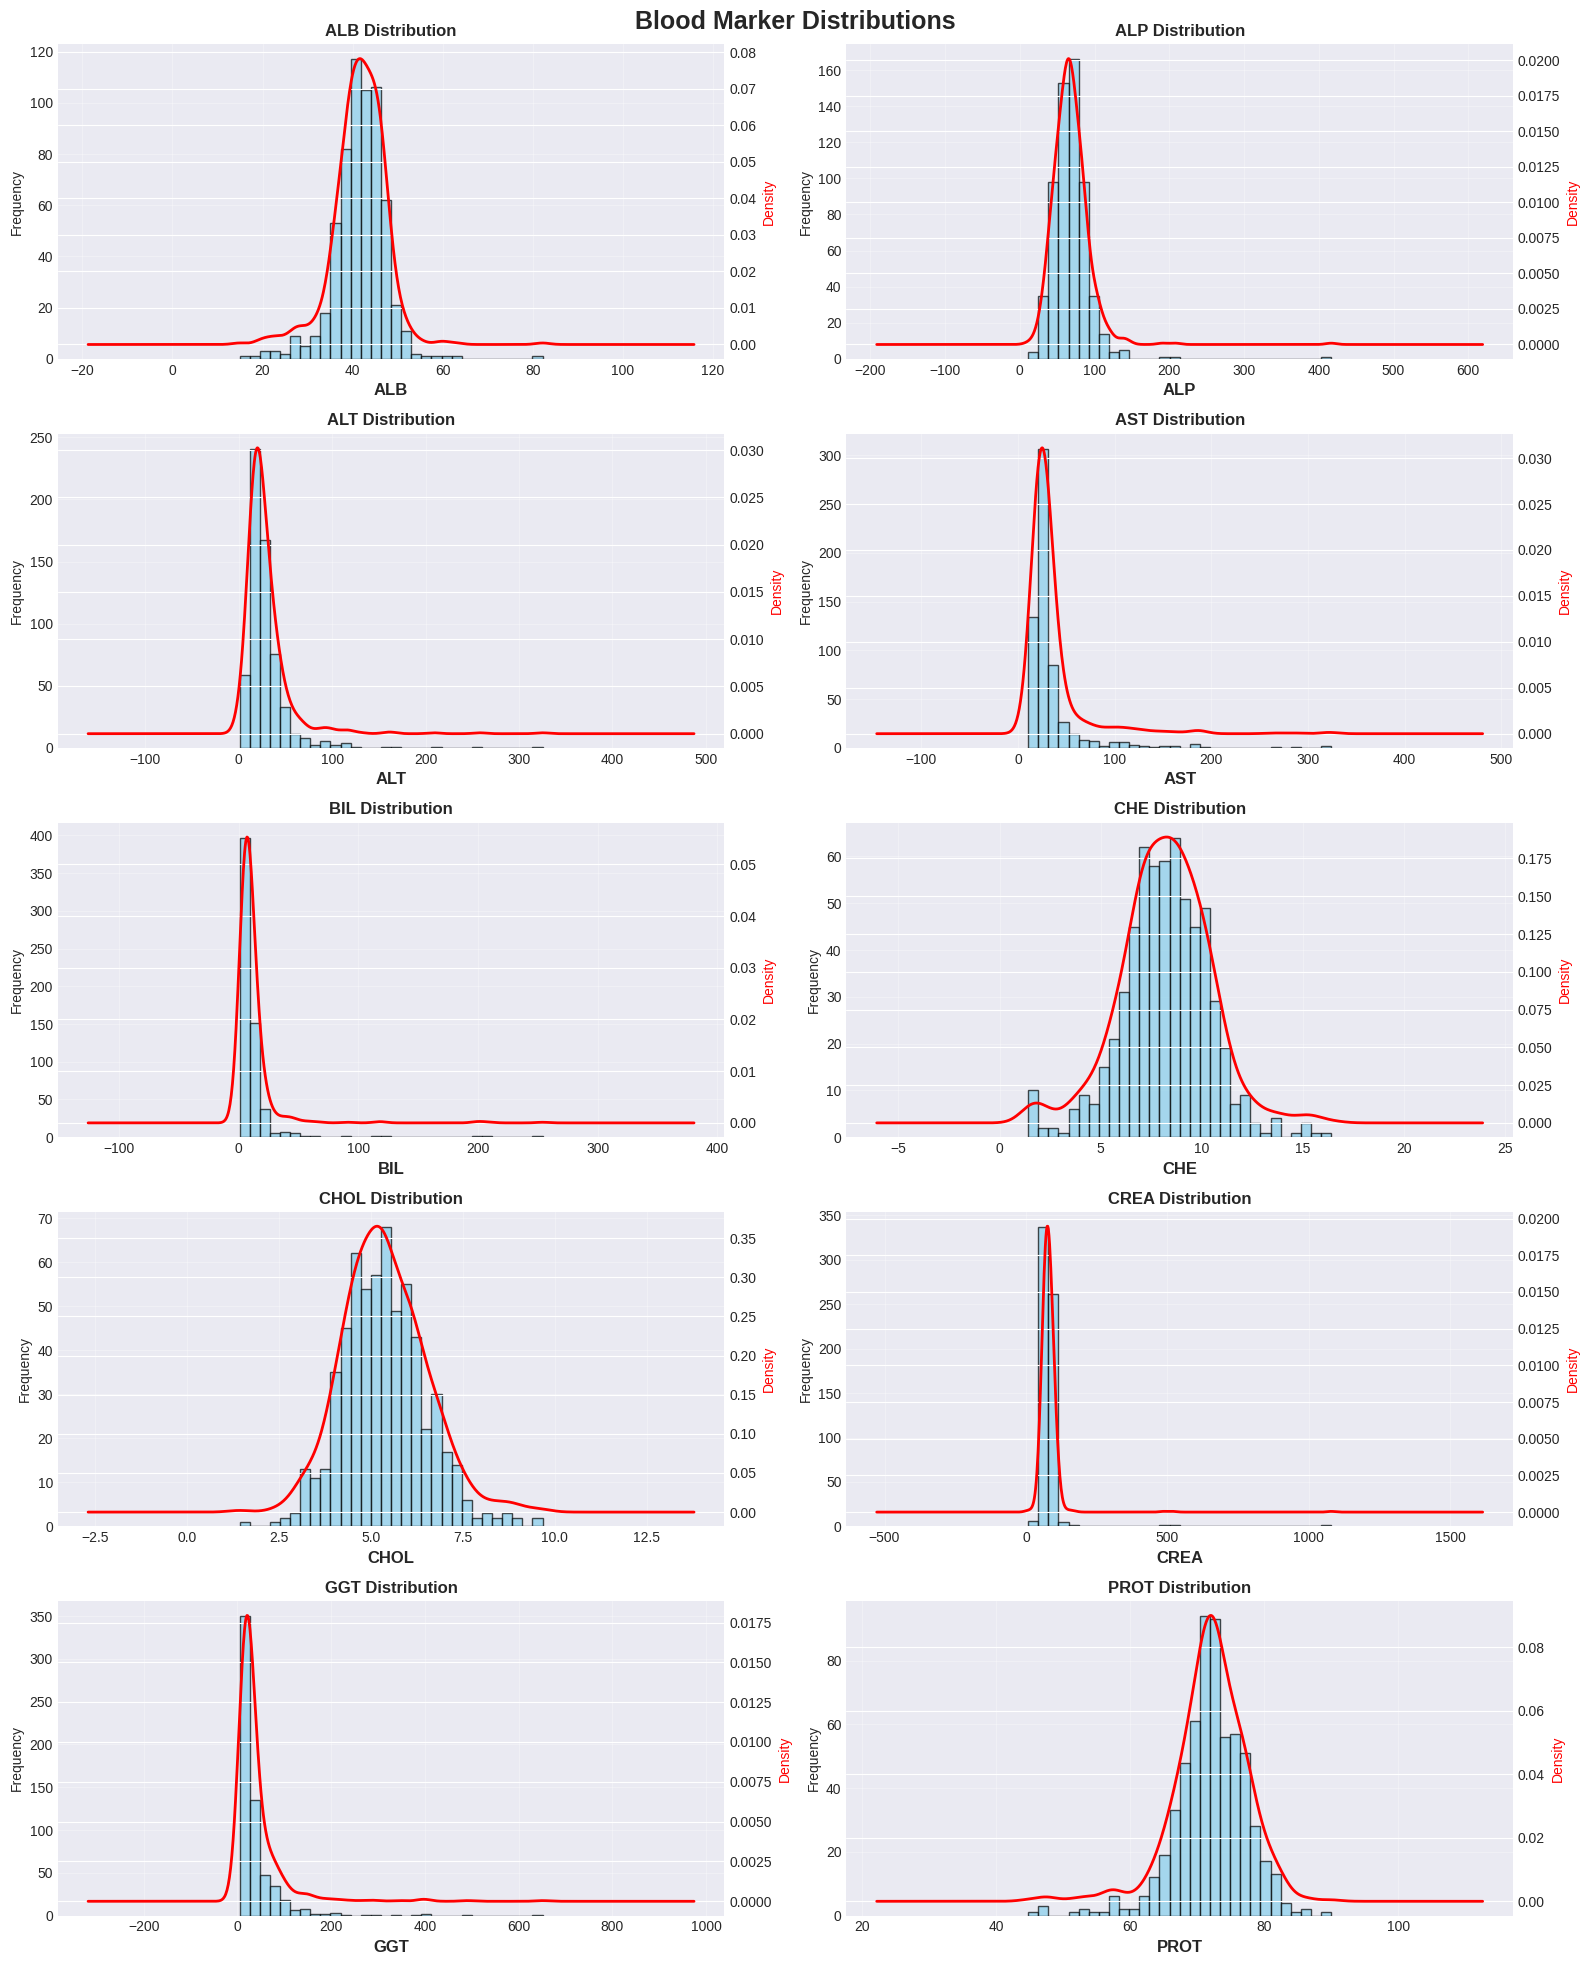

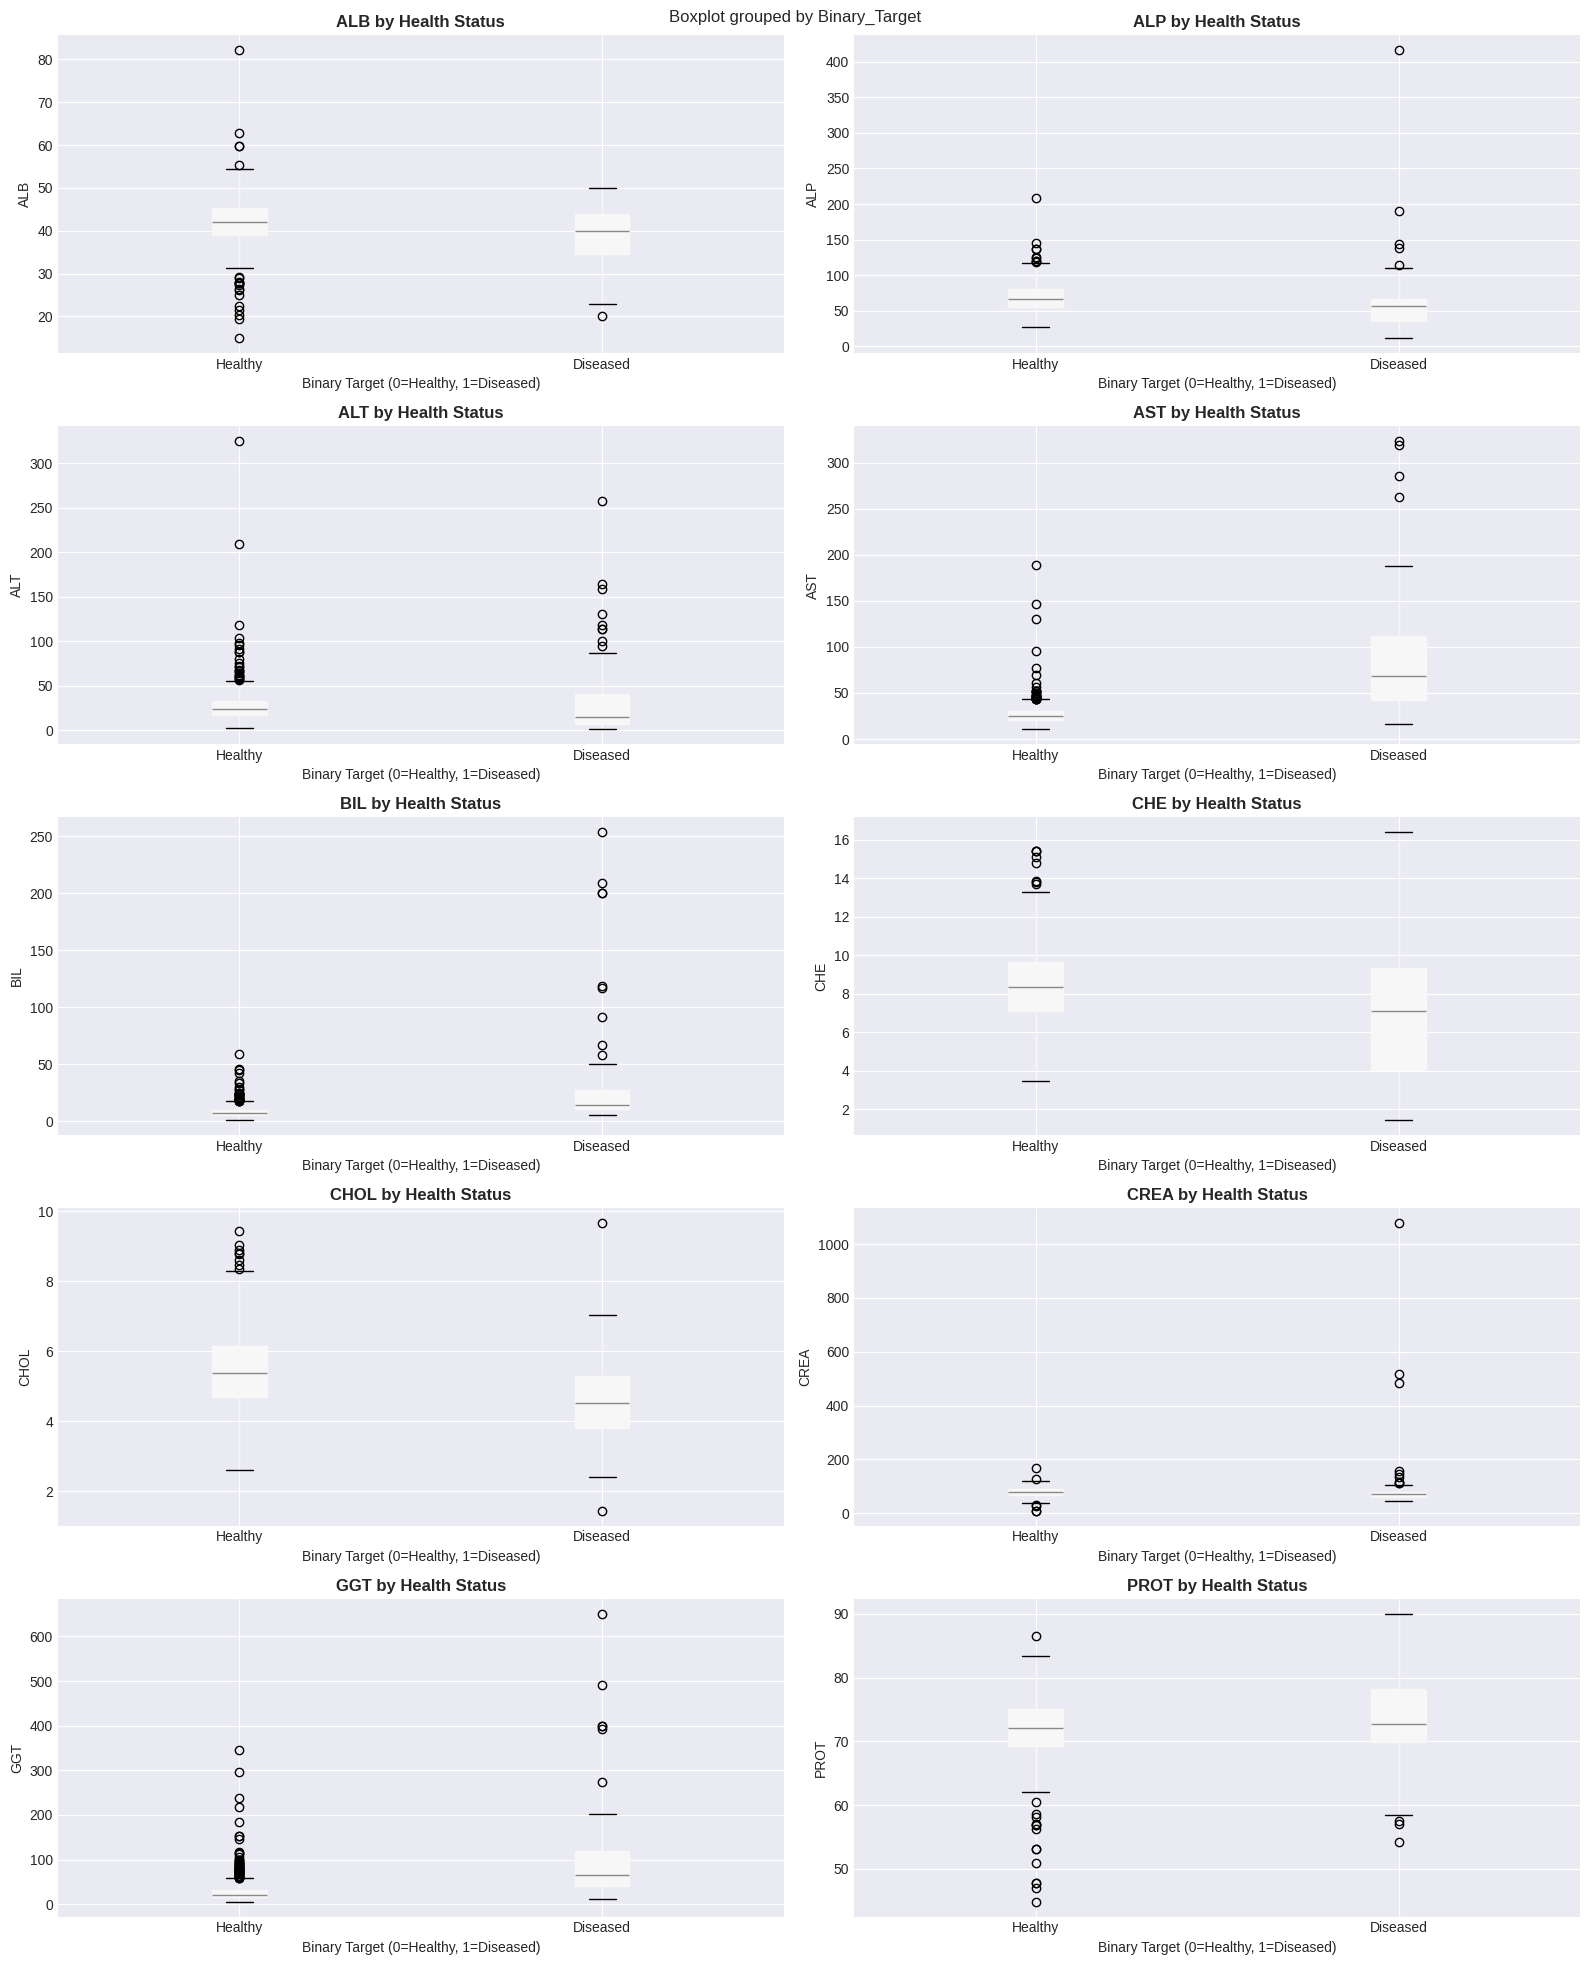

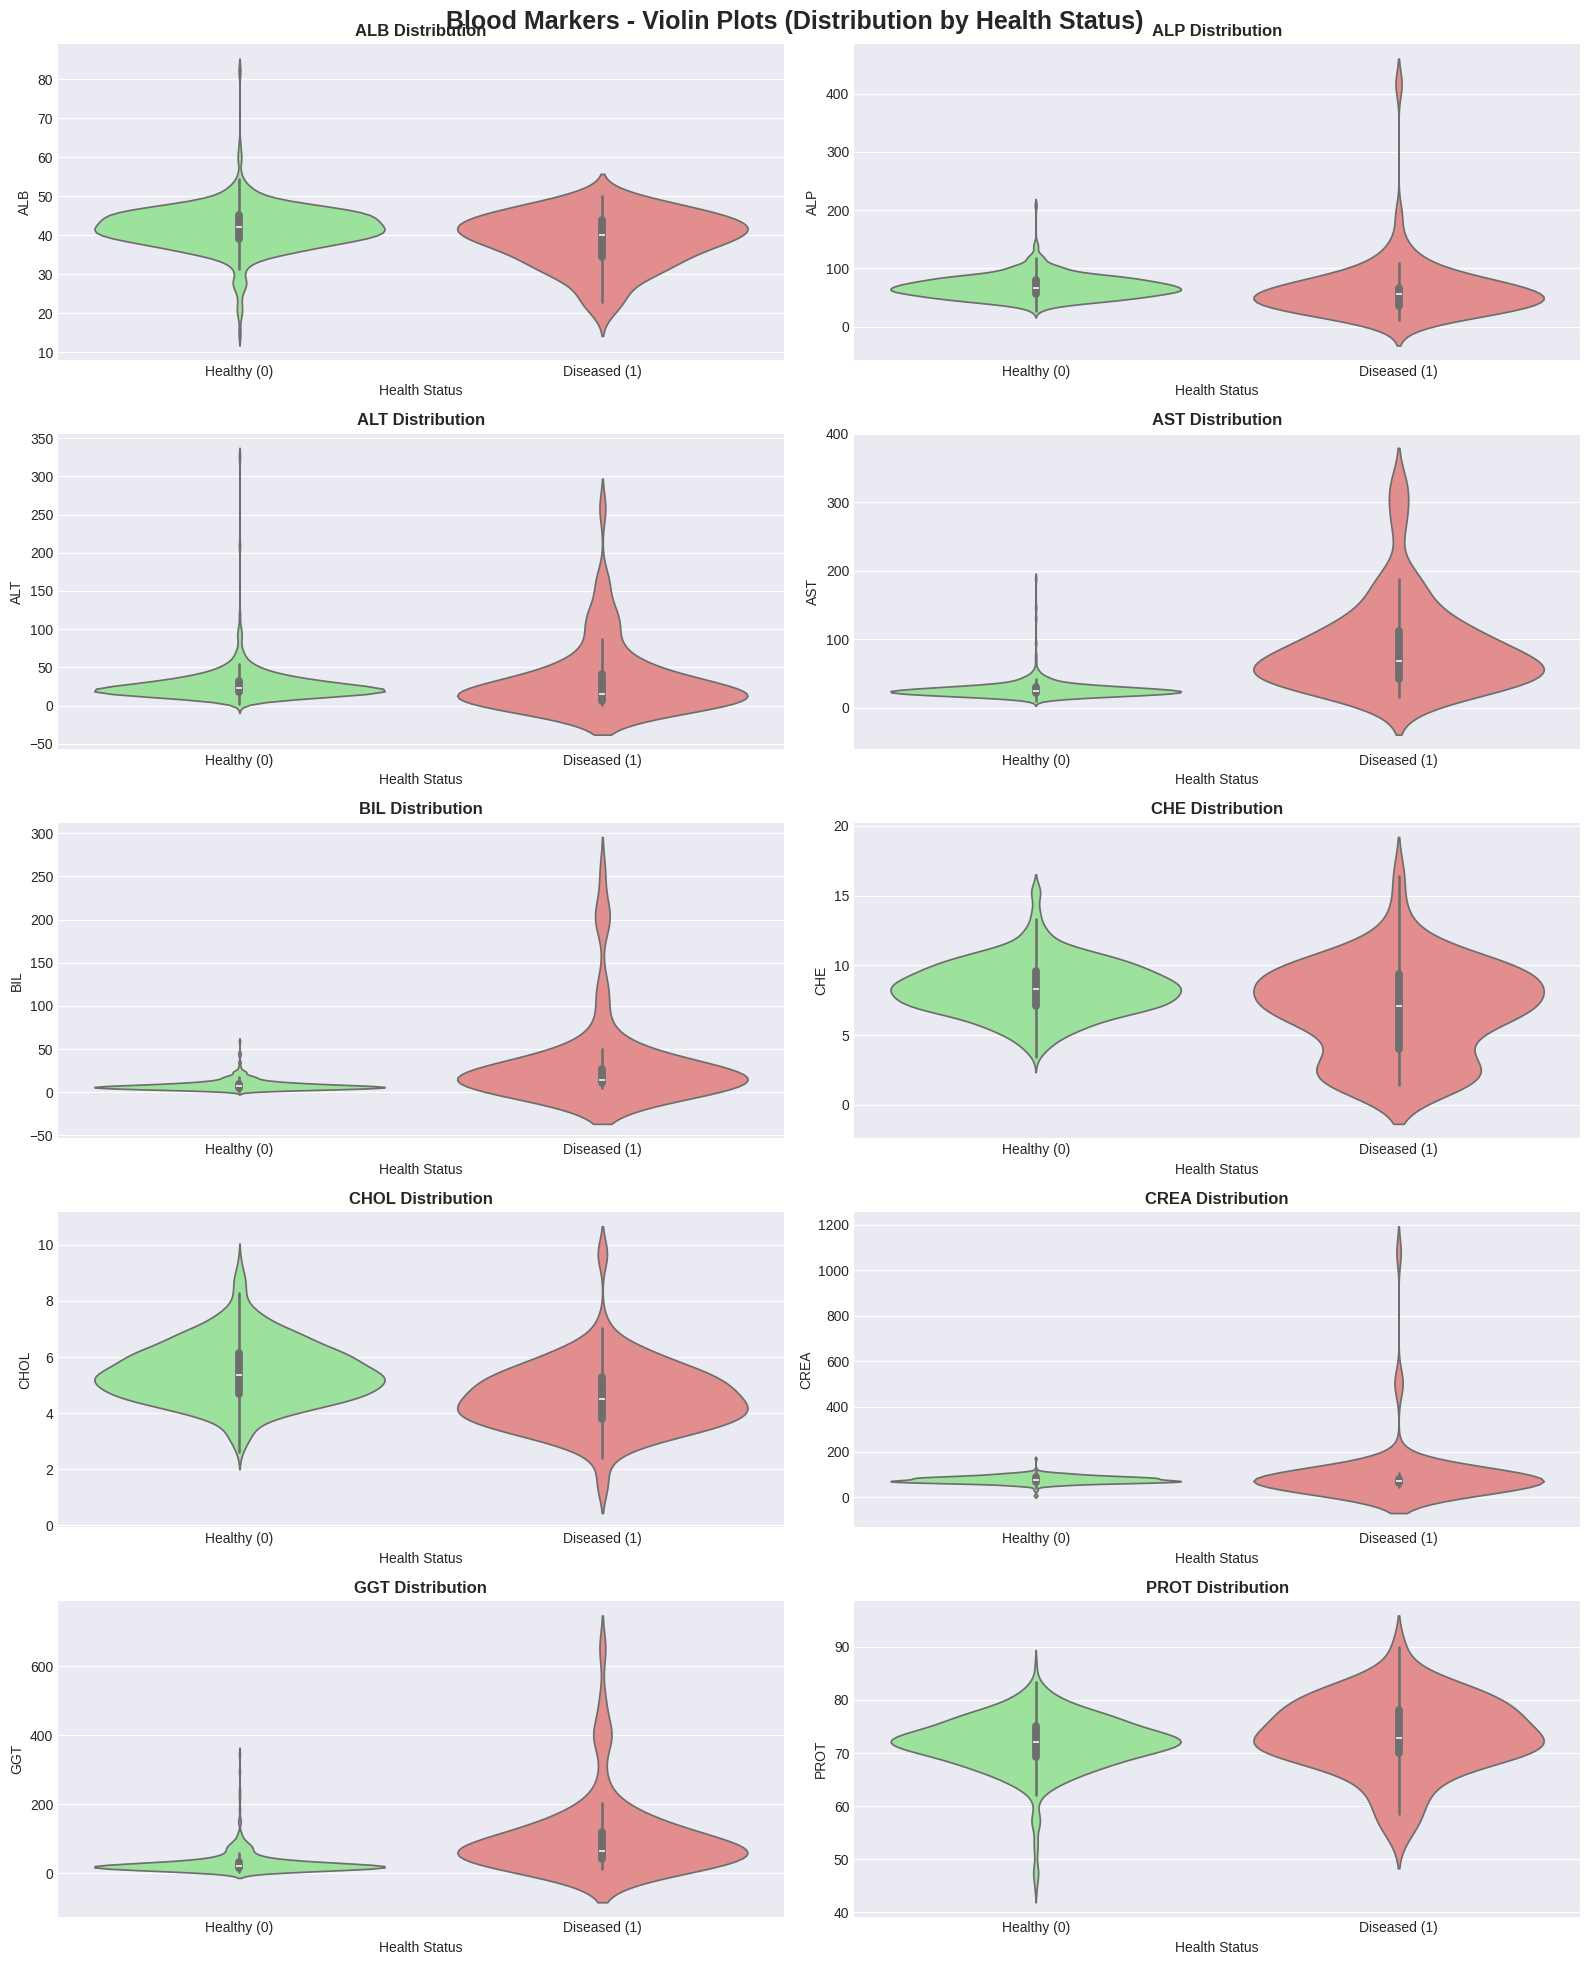

In [ ]:
# 9. FEATURE DISTRIBUTIONS

print(" FEATURE DISTRIBUTION ANALYSIS")

# Select blood marker features
blood_markers = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Visualization 5: Distribution of all blood markers
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
fig.suptitle('Blood Marker Distributions', fontsize=18, fontweight='bold')

for idx, col in enumerate(blood_markers):
    row = idx // 2
    col_idx = idx % 2

    ax = axes[row, col_idx]

    # Histogram with KDE
    ax.hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax2 = ax.twinx()
    df[col].dropna().plot(kind='kde', ax=ax2, color='red', linewidth=2)

    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=10)
    ax2.set_ylabel('Density', fontsize=10, color='red')
    ax.set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualization 6: Box plots for outlier detection
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
fig.suptitle('Blood Markers - Box Plots (Outlier Detection)', fontsize=18, fontweight='bold')

for idx, col in enumerate(blood_markers):
    row = idx // 2
    col_idx = idx % 2

    ax = axes[row, col_idx]
    df.boxplot(column=col, by='Binary_Target', ax=ax, patch_artist=True)
    ax.set_title(f'{col} by Health Status', fontsize=12, fontweight='bold')
    ax.set_xlabel('Binary Target (0=Healthy, 1=Diseased)', fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    plt.sca(ax)
    plt.xticks([1, 2], ['Healthy', 'Diseased'])

plt.tight_layout()
plt.show()

# Visualization 7: Violin plots (combines box plot + distribution)
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
fig.suptitle('Blood Markers - Violin Plots (Distribution by Health Status)',
             fontsize=18, fontweight='bold')

for idx, col in enumerate(blood_markers):
    row = idx // 2
    col_idx = idx % 2

    ax = axes[row, col_idx]
    sns.violinplot(data=df, x='Binary_Target', y=col, ax=ax, palette=['lightgreen', 'lightcoral'])
    ax.set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Health Status', fontsize=10)
    ax.set_xticklabels(['Healthy (0)', 'Diseased (1)'])

plt.tight_layout()
plt.show()

🔗 CORRELATION ANALYSIS

 Correlation with Target Variable:


,Binary_Target
Binary_Target,1.000000
AST,0.621724
GGT,0.437680
BIL,0.398451
CREA,0.136772
ALT,0.087787
PROT,0.084082
Sex_Encoded,0.071663
Age,0.037781
ALP,-0.067737


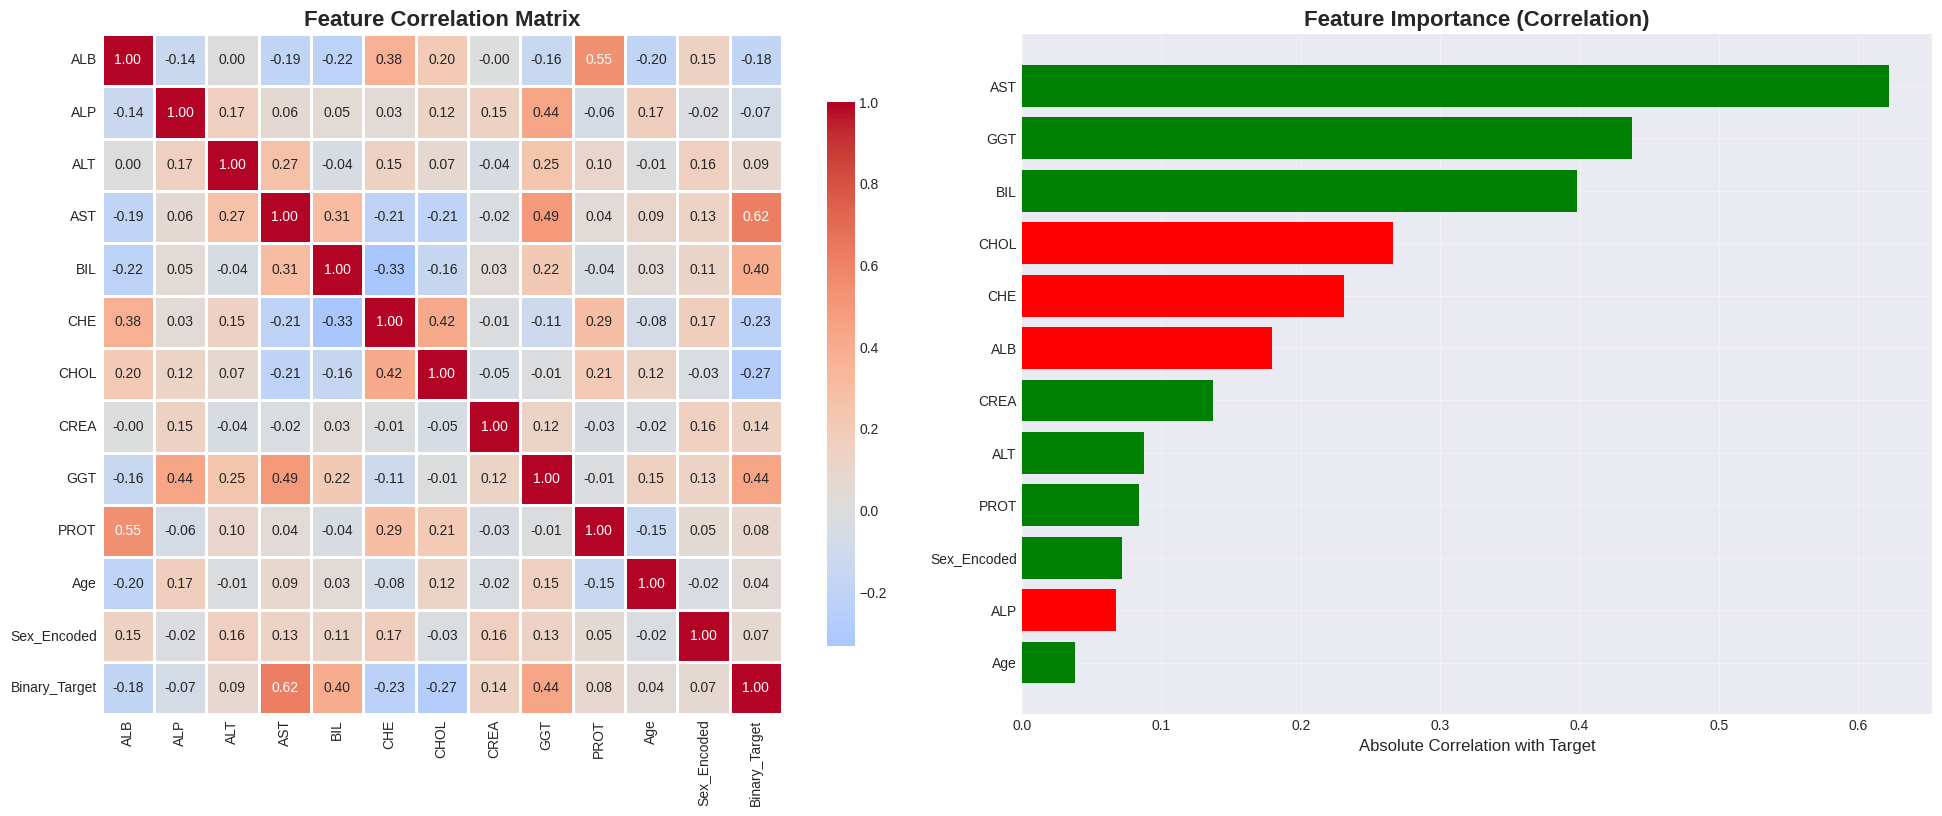

In [ ]:
# 10. CORRELATION ANALYSIS

print("🔗 CORRELATION ANALYSIS")

# Prepare data for correlation
features_for_corr = blood_markers + ['Age', 'Sex_Encoded', 'Binary_Target']
corr_df = df[features_for_corr].corr()

print("\n Correlation with Target Variable:")
target_corr = corr_df['Binary_Target'].sort_values(ascending=False)
display(target_corr)

# Visualization 8: Correlation Heatmap
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 8.1 Full correlation matrix
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold')

# 8.2 Target correlation bar plot
target_corr_abs = target_corr.drop('Binary_Target').abs().sort_values(ascending=True)
colors_corr = ['red' if x < 0 else 'green' for x in target_corr.drop('Binary_Target').loc[target_corr_abs.index]]
axes[1].barh(range(len(target_corr_abs)), target_corr_abs.values, color=colors_corr)
axes[1].set_yticks(range(len(target_corr_abs)))
axes[1].set_yticklabels(target_corr_abs.index)
axes[1].set_xlabel('Absolute Correlation with Target', fontsize=12)
axes[1].set_title('Feature Importance (Correlation)', fontsize=16, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interactive correlation heatmap
fig_corr = px.imshow(corr_df,
                      text_auto='.2f',
                      aspect='auto',
                      color_continuous_scale='RdBu_r',
                      title='Interactive Correlation Heatmap')
fig_corr.update_layout(height=700)
fig_corr.show()

 AGE DISTRIBUTION ANALYSIS

 Age Statistics:
count    615.000000
mean      47.408130
std       10.055105
min       19.000000
25%       39.000000
50%       47.000000
75%       54.000000
max       77.000000
Name: Age, dtype: float64


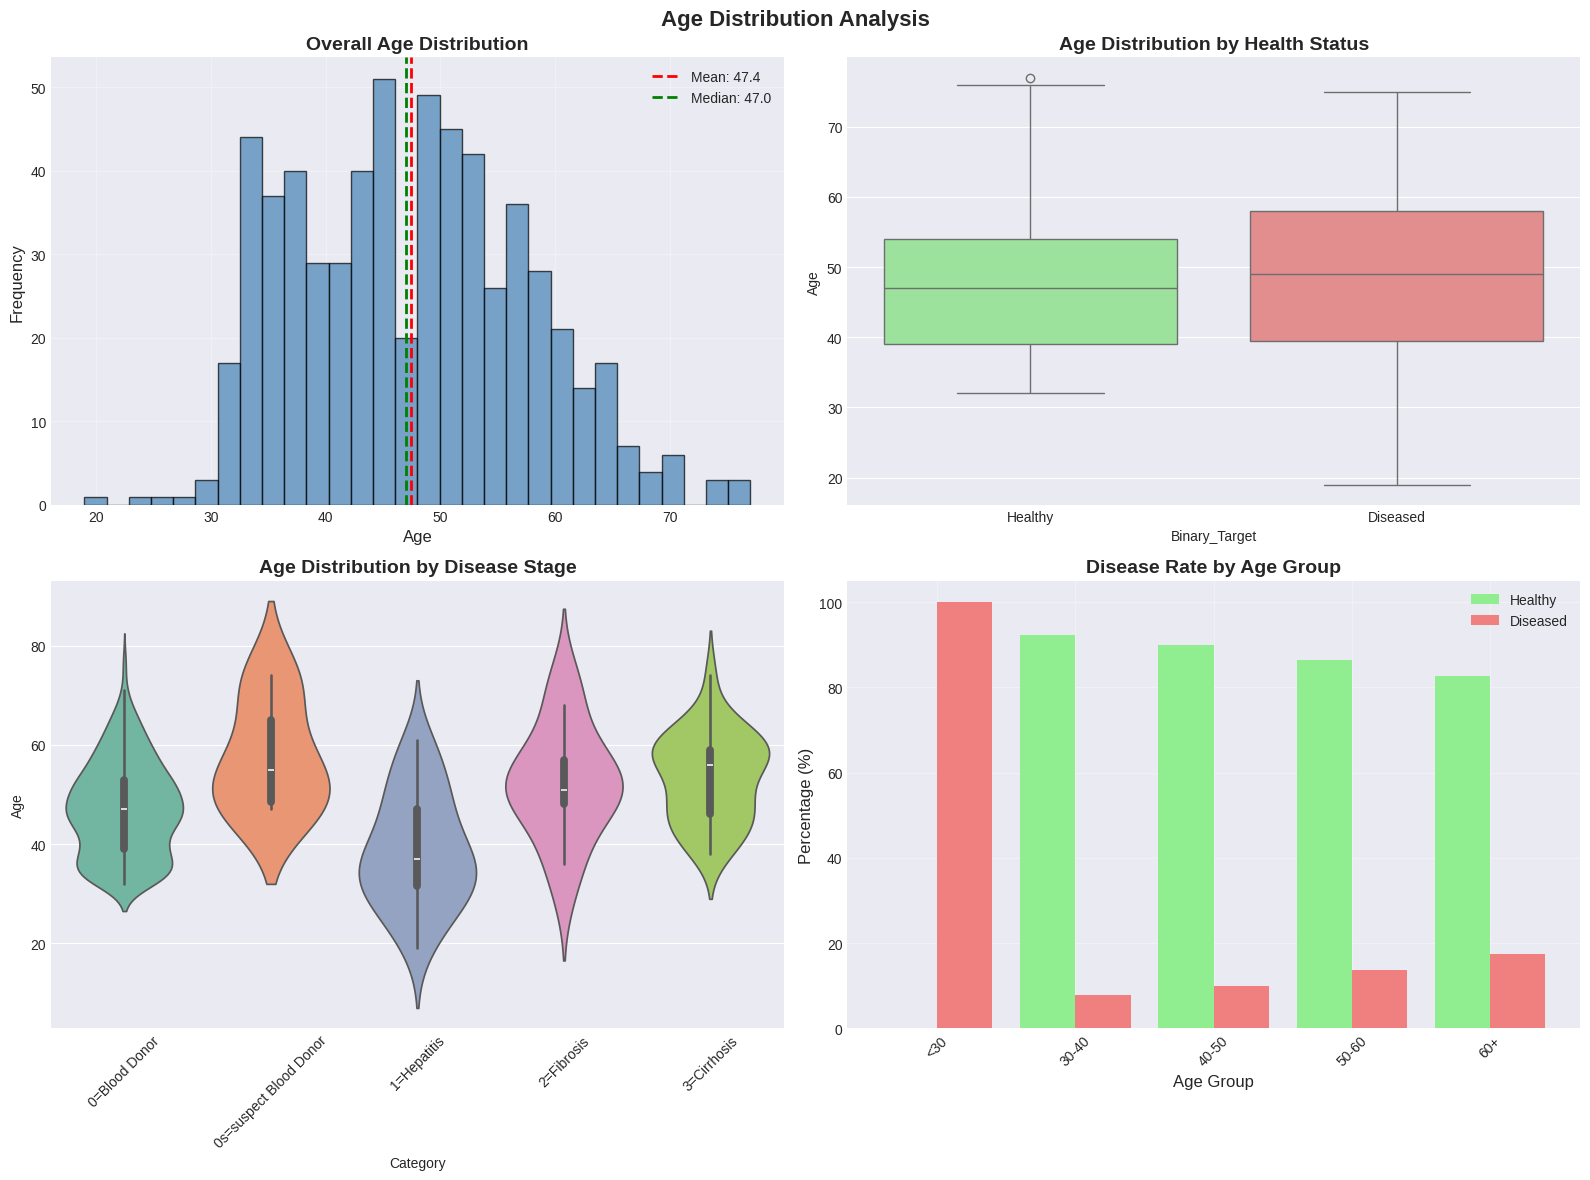

In [ ]:
# 11. AGE DISTRIBUTION ANALYSIS

print(" AGE DISTRIBUTION ANALYSIS")


print("\n Age Statistics:")
print(df['Age'].describe())

# Visualization 9: Age Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Age Distribution Analysis', fontsize=16, fontweight='bold')

# 9.1 Overall age distribution
axes[0, 0].hist(df['Age'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
axes[0, 0].axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Overall Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 9.2 Age by health status
sns.boxplot(data=df, x='Binary_Target', y='Age', ax=axes[0, 1], palette=['lightgreen', 'lightcoral'])
axes[0, 1].set_title('Age Distribution by Health Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xticklabels(['Healthy', 'Diseased'])

# 9.3 Age by original category
sns.violinplot(data=df, x='Category', y='Age', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Age Distribution by Disease Stage', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# 9.4 Age bins analysis
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_group_target = pd.crosstab(df['Age_Group'], df['Binary_Target'], normalize='index') * 100
age_group_target.plot(kind='bar', ax=axes[1, 1], color=['lightgreen', 'lightcoral'], width=0.8)
axes[1, 1].set_title('Disease Rate by Age Group', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Age Group', fontsize=12)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 1].legend(['Healthy', 'Diseased'])
axes[1, 1].grid(True, alpha=0.3)
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 12. CLASS IMBALANCE CHECK

print(" CLASS IMBALANCE ANALYSIS")


# Calculate imbalance ratio
class_0_count = binary_counts[0]
class_1_count = binary_counts[1]
imbalance_ratio = class_0_count / class_1_count

print(f"\n Class Distribution:")
print(f"   Healthy (0): {class_0_count} samples ({class_0_count/len(df)*100:.2f}%)")
print(f"   Diseased (1): {class_1_count} samples ({class_1_count/len(df)*100:.2f}%)")
print(f"\n Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("⚠️ WARNING: Dataset is imbalanced!")
    print("   Recommendation: Consider using SMOTE or class weights during training")
else:
    print("✅ Dataset is relatively balanced")

# Visualization 10: Class Imbalance
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type':'domain'}, {'type':'bar'}]],
    subplot_titles=('Class Distribution (Pie)', 'Class Distribution (Bar)')
)

fig.add_trace(
    go.Pie(labels=['Healthy', 'Diseased'],
           values=binary_counts.values,
           marker_colors=['#2ecc71', '#e74c3c']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=['Healthy', 'Diseased'],
           y=binary_counts.values,
           marker_color=['#2ecc71', '#e74c3c'],
           text=binary_counts.values,
           textposition='auto'),
    row=1, col=2
)

fig.update_layout(
    title_text='Binary Classification - Class Balance Check',
    showlegend=False,
    height=400
)
fig.show()


 CLASS IMBALANCE ANALYSIS

 Class Distribution:
   Healthy (0): 540 samples (87.80%)
   Diseased (1): 75 samples (12.20%)

 Imbalance Ratio: 7.20:1
⚠️ WARNING: Dataset is imbalanced!
   Recommendation: Consider using SMOTE or class weights during training


In [ ]:
# Prepare final feature set
feature_columns = blood_markers + ['Age', 'Sex_Encoded']
target_column = 'Binary_Target'

# Create final dataset
X = df[feature_columns].copy()
y = df[target_column].copy()

print(f"\n Final Dataset Shape:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")

print(f"\n Feature Names ({len(feature_columns)} features):")
for i, feat in enumerate(feature_columns, 1):
    print(f"   {i}. {feat}")

print(f"\n Target Variable: {target_column}")
print(f"   Classes: 0 (Healthy), 1 (Diseased)")




 Final Dataset Shape:
   Features (X): (615, 12)
   Target (y): (615,)

 Feature Names (12 features):
   1. ALB
   2. ALP
   3. ALT
   4. AST
   5. BIL
   6. CHE
   7. CHOL
   8. CREA
   9. GGT
   10. PROT
   11. Age
   12. Sex_Encoded

 Target Variable: Binary_Target
   Classes: 0 (Healthy), 1 (Diseased)


 APPLYING SMOTE (Synthetic Minority Over-sampling Technique)

 BEFORE SMOTE:
   Total samples: 615
   Healthy (0): 540 samples (87.80%)
   Diseased (1): 75 samples (12.20%)
   Imbalance Ratio: 7.20:1

 Applying SMOTE...

 AFTER SMOTE:
   Total samples: 1080
   Healthy (0): 540 samples (50.00%)
   Diseased (1): 540 samples (50.00%)
   Imbalance Ratio: 1.00:1

✅ Dataset is now BALANCED!


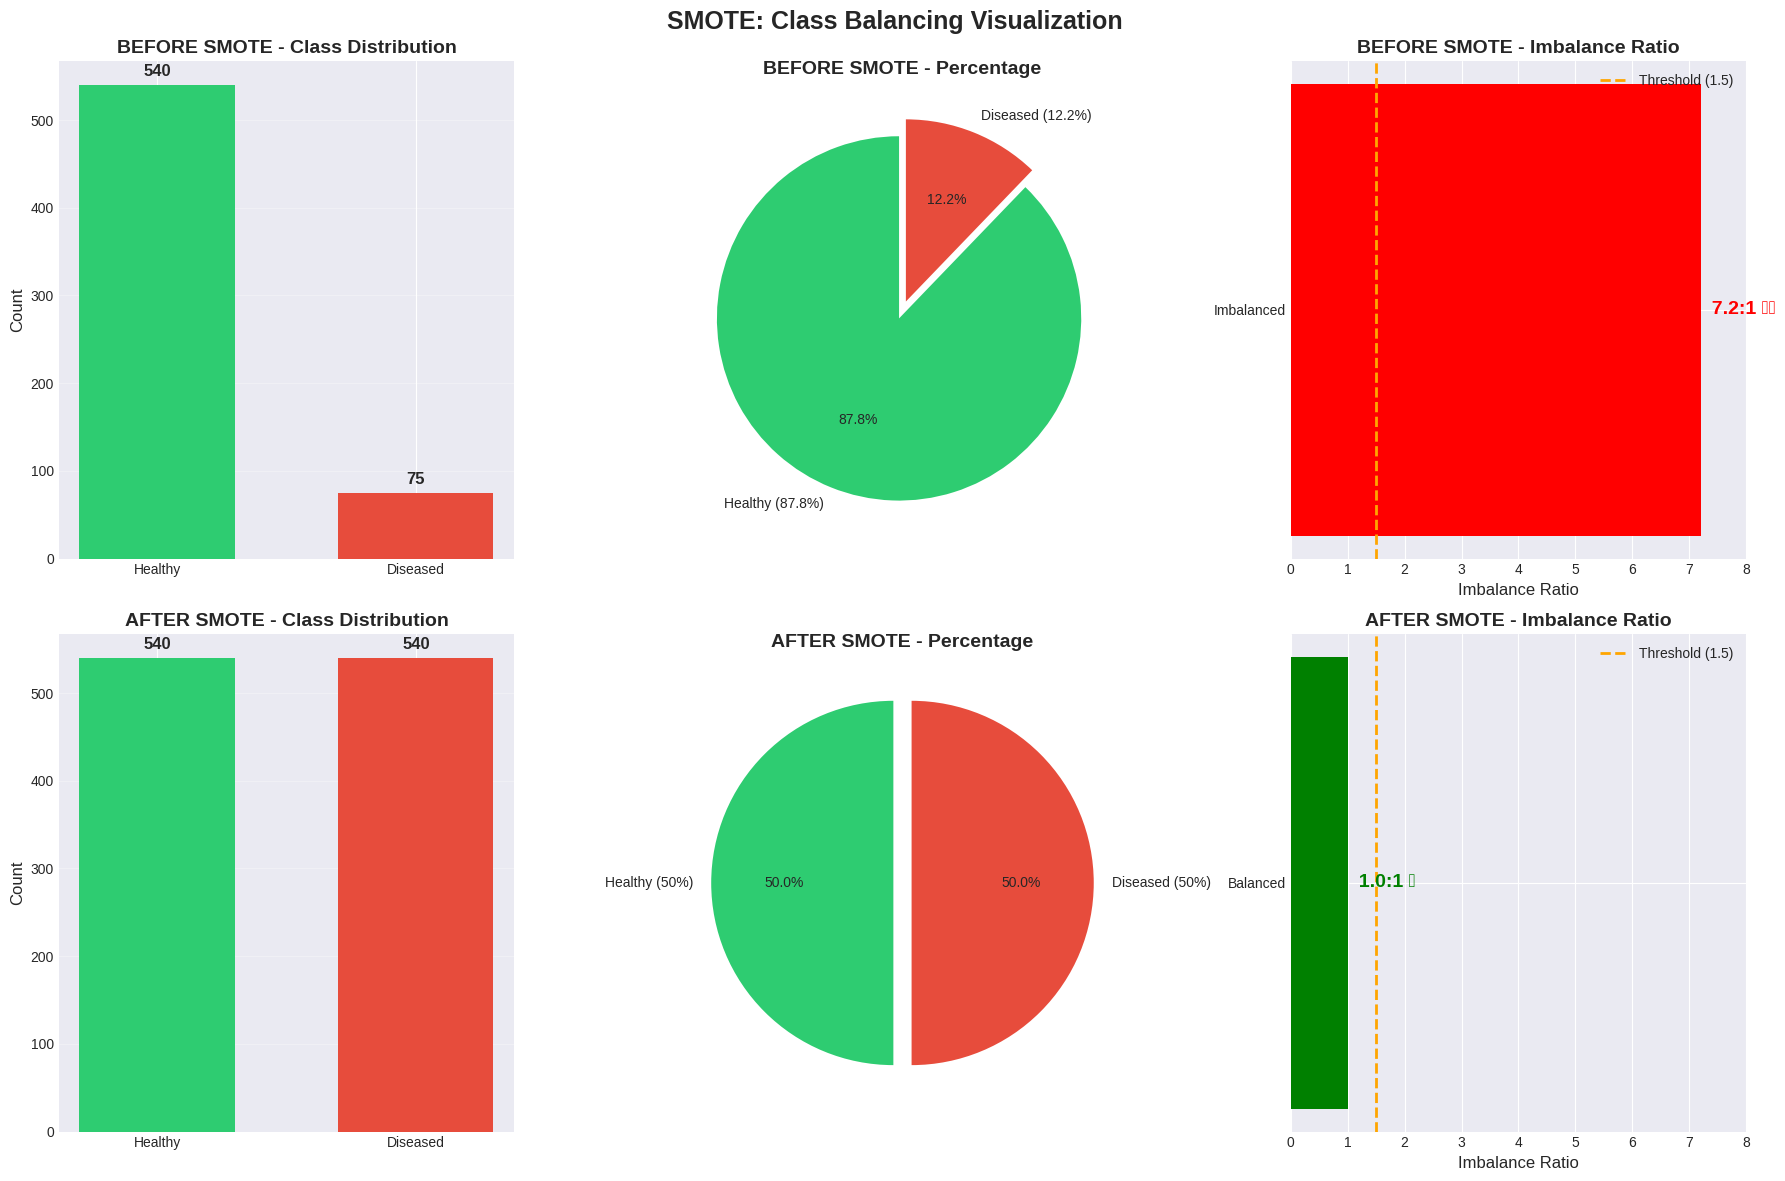


 Visualizing Synthetic Sample Distribution...


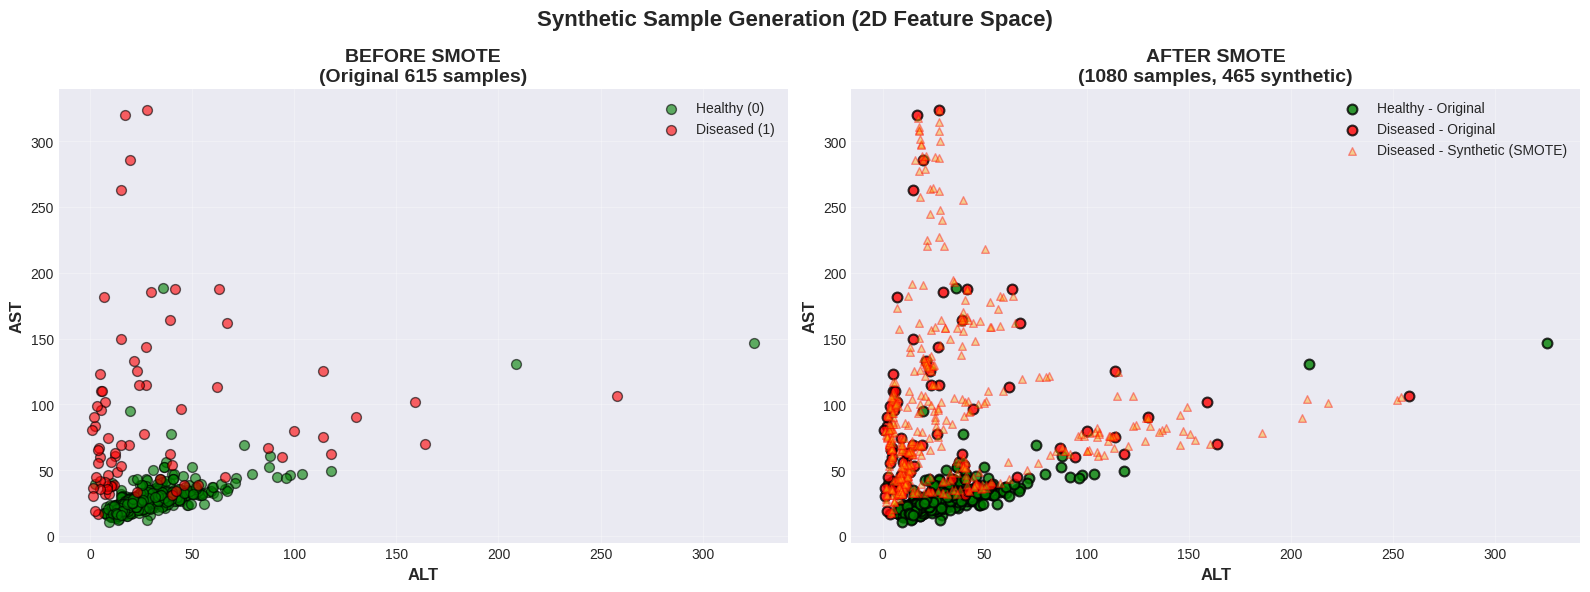


✅ SMOTE BALANCING COMPLETE

 Updated Dataset Shape:
   Features (X): (1080, 12)
   Target (y): (1080,)

✅ Balanced Dataset Ready for Model Training!
   - Original samples: Preserved
   - Synthetic samples: Generated for minority class
   - Class distribution: 50-50 (Perfect balance)

 Saving balanced dataset...
✅ Saved as 'hepatitis_balanced.csv'
 PHASE 1 COMPLETE (WITH SMOTE BALANCING)!
✅ Ready to proceed to Phase 2: Model Development


In [ ]:
# 12.5 HANDLE CLASS IMBALANCE WITH SMOTE

print(" APPLYING SMOTE (Synthetic Minority Over-sampling Technique)")

from imblearn.over_sampling import SMOTE
from collections import Counter

# Install if needed
try:
    from imblearn.over_sampling import SMOTE
except:
    !pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

# Prepare features and target BEFORE SMOTE
X_before_smote = df[feature_columns].copy()
y_before_smote = df[target_column].copy()

print(f"\n BEFORE SMOTE:")
print(f"   Total samples: {len(y_before_smote)}")
print(f"   Healthy (0): {sum(y_before_smote == 0)} samples ({sum(y_before_smote == 0)/len(y_before_smote)*100:.2f}%)")
print(f"   Diseased (1): {sum(y_before_smote == 1)} samples ({sum(y_before_smote == 1)/len(y_before_smote)*100:.2f}%)")
print(f"   Imbalance Ratio: {sum(y_before_smote == 0) / sum(y_before_smote == 1):.2f}:1")

# Apply SMOTE
print("\n Applying SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_balanced, y_balanced = smote.fit_resample(X_before_smote, y_before_smote)

print(f"\n AFTER SMOTE:")
print(f"   Total samples: {len(y_balanced)}")
print(f"   Healthy (0): {sum(y_balanced == 0)} samples ({sum(y_balanced == 0)/len(y_balanced)*100:.2f}%)")
print(f"   Diseased (1): {sum(y_balanced == 1)} samples ({sum(y_balanced == 1)/len(y_balanced)*100:.2f}%)")
print(f"   Imbalance Ratio: {sum(y_balanced == 0) / sum(y_balanced == 1):.2f}:1")

print("\n✅ Dataset is now BALANCED!")

# Visualization: Before vs After SMOTE

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SMOTE: Class Balancing Visualization', fontsize=18, fontweight='bold')

# Row 1: Before SMOTE
# 1.1 Bar chart - Before
axes[0, 0].bar(['Healthy', 'Diseased'],
               [sum(y_before_smote == 0), sum(y_before_smote == 1)],
               color=['#2ecc71', '#e74c3c'], width=0.6)
axes[0, 0].set_title('BEFORE SMOTE - Class Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count', fontsize=12)
for i, v in enumerate([sum(y_before_smote == 0), sum(y_before_smote == 1)]):
    axes[0, 0].text(i, v + 10, str(v), ha='center', fontweight='bold', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# 1.2 Pie chart - Before
axes[0, 1].pie([sum(y_before_smote == 0), sum(y_before_smote == 1)],
               labels=['Healthy (87.8%)', 'Diseased (12.2%)'],
               autopct='%1.1f%%',
               colors=['#2ecc71', '#e74c3c'],
               explode=(0.05, 0.05),
               startangle=90)
axes[0, 1].set_title('BEFORE SMOTE - Percentage', fontsize=14, fontweight='bold')

# 1.3 Imbalance visualization
axes[0, 2].barh(['Imbalanced'], [7.2], color='red', height=0.4)
axes[0, 2].set_xlim(0, 8)
axes[0, 2].set_xlabel('Imbalance Ratio', fontsize=12)
axes[0, 2].set_title('BEFORE SMOTE - Imbalance Ratio', fontsize=14, fontweight='bold')
axes[0, 2].text(7.2, 0, '  7.2:1 ⚠️', va='center', fontsize=14, fontweight='bold', color='red')
axes[0, 2].axvline(1.5, color='orange', linestyle='--', linewidth=2, label='Threshold (1.5)')
axes[0, 2].legend()

# Row 2: After SMOTE
# 2.1 Bar chart - After
axes[1, 0].bar(['Healthy', 'Diseased'],
               [sum(y_balanced == 0), sum(y_balanced == 1)],
               color=['#2ecc71', '#e74c3c'], width=0.6)
axes[1, 0].set_title('AFTER SMOTE - Class Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Count', fontsize=12)
for i, v in enumerate([sum(y_balanced == 0), sum(y_balanced == 1)]):
    axes[1, 0].text(i, v + 10, str(v), ha='center', fontweight='bold', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# 2.2 Pie chart - After
axes[1, 1].pie([sum(y_balanced == 0), sum(y_balanced == 1)],
               labels=['Healthy (50%)', 'Diseased (50%)'],
               autopct='%1.1f%%',
               colors=['#2ecc71', '#e74c3c'],
               explode=(0.05, 0.05),
               startangle=90)
axes[1, 1].set_title('AFTER SMOTE - Percentage', fontsize=14, fontweight='bold')

# 2.3 Balance visualization
axes[1, 2].barh(['Balanced'], [1.0], color='green', height=0.4)
axes[1, 2].set_xlim(0, 8)
axes[1, 2].set_xlabel('Imbalance Ratio', fontsize=12)
axes[1, 2].set_title('AFTER SMOTE - Imbalance Ratio', fontsize=14, fontweight='bold')
axes[1, 2].text(1.0, 0, '  1.0:1 ✅', va='center', fontsize=14, fontweight='bold', color='green')
axes[1, 2].axvline(1.5, color='orange', linestyle='--', linewidth=2, label='Threshold (1.5)')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# -----------------------------
# Interactive Comparison
# -----------------------------

fig_comparison = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Before SMOTE', 'After SMOTE'),
    specs=[[{'type':'bar'}, {'type':'bar'}]]
)

# Before SMOTE
fig_comparison.add_trace(
    go.Bar(x=['Healthy', 'Diseased'],
           y=[sum(y_before_smote == 0), sum(y_before_smote == 1)],
           marker_color=['#2ecc71', '#e74c3c'],
           text=[sum(y_before_smote == 0), sum(y_before_smote == 1)],
           textposition='auto',
           name='Before'),
    row=1, col=1
)

# After SMOTE
fig_comparison.add_trace(
    go.Bar(x=['Healthy', 'Diseased'],
           y=[sum(y_balanced == 0), sum(y_balanced == 1)],
           marker_color=['#2ecc71', '#e74c3c'],
           text=[sum(y_balanced == 0), sum(y_balanced == 1)],
           textposition='auto',
           name='After'),
    row=1, col=2
)

fig_comparison.update_layout(
    title_text='Class Distribution: Before vs After SMOTE',
    showlegend=False,
    height=500
)
fig_comparison.show()

# Visualize Synthetic Samples Distribution

print("\n Visualizing Synthetic Sample Distribution...")

# Select 2 important features for visualization
feature_1 = 'ALT'  # Most correlated with target
feature_2 = 'AST'  # Second most correlated

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Synthetic Sample Generation (2D Feature Space)', fontsize=16, fontweight='bold')

# Before SMOTE
axes[0].scatter(X_before_smote[y_before_smote == 0][feature_1],
                X_before_smote[y_before_smote == 0][feature_2],
                c='green', label='Healthy (0)', alpha=0.6, s=50, edgecolors='black')
axes[0].scatter(X_before_smote[y_before_smote == 1][feature_1],
                X_before_smote[y_before_smote == 1][feature_2],
                c='red', label='Diseased (1)', alpha=0.6, s=50, edgecolors='black')
axes[0].set_xlabel(feature_1, fontsize=12, fontweight='bold')
axes[0].set_ylabel(feature_2, fontsize=12, fontweight='bold')
axes[0].set_title(f'BEFORE SMOTE\n(Original {len(y_before_smote)} samples)',
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# After SMOTE - distinguish original vs synthetic
original_mask = np.arange(len(X_before_smote))
X_balanced_df = pd.DataFrame(X_balanced, columns=feature_columns)

# Original samples
axes[1].scatter(X_balanced_df.loc[original_mask[y_before_smote == 0], feature_1],
                X_balanced_df.loc[original_mask[y_before_smote == 0], feature_2],
                c='green', label='Healthy - Original', alpha=0.8, s=50,
                edgecolors='black', linewidths=1.5)
axes[1].scatter(X_balanced_df.loc[original_mask[y_before_smote == 1], feature_1],
                X_balanced_df.loc[original_mask[y_before_smote == 1], feature_2],
                c='red', label='Diseased - Original', alpha=0.8, s=50,
                edgecolors='black', linewidths=1.5)

# Synthetic samples (only for minority class)
synthetic_mask = np.arange(len(X_before_smote), len(X_balanced))
axes[1].scatter(X_balanced_df.loc[synthetic_mask, feature_1],
                X_balanced_df.loc[synthetic_mask, feature_2],
                c='orange', label='Diseased - Synthetic (SMOTE)', alpha=0.4, s=30,
                marker='^', edgecolors='red', linewidths=1)

axes[1].set_xlabel(feature_1, fontsize=12, fontweight='bold')
axes[1].set_ylabel(feature_2, fontsize=12, fontweight='bold')
axes[1].set_title(f'AFTER SMOTE\n({len(y_balanced)} samples, {len(synthetic_mask)} synthetic)',
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Update final dataset variables

print("\n" + "=" * 80)
print("✅ SMOTE BALANCING COMPLETE")
print("=" * 80)

# Update X and y to use balanced dataset
X = pd.DataFrame(X_balanced, columns=feature_columns)
y = pd.Series(y_balanced, name=target_column)

print(f"\n Updated Dataset Shape:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")

print(f"\n✅ Balanced Dataset Ready for Model Training!")
print("   - Original samples: Preserved")
print("   - Synthetic samples: Generated for minority class")
print("   - Class distribution: 50-50 (Perfect balance)")

# Save balanced dataset
print("\n Saving balanced dataset...")
balanced_df = pd.concat([X, y], axis=1)
balanced_df.to_csv('hepatitis_balanced.csv', index=False)
print("✅ Saved as 'hepatitis_balanced.csv'")

print(" PHASE 1 COMPLETE (WITH SMOTE BALANCING)!")
print("✅ Ready to proceed to Phase 2: Model Development")


PHASE 2: MODEL DEVELOPMENT & EVALUATION


In [ ]:
# 1. IMPORT MODELING LIBRARIES

print(" PHASE 2: MODEL DEVELOPMENT")


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix,
                             roc_curve, roc_auc_score, auc)
from sklearn.preprocessing import StandardScaler
import joblib
import time
from datetime import datetime

print("✅ All modeling libraries imported successfully!")

 PHASE 2: MODEL DEVELOPMENT
✅ All modeling libraries imported successfully!


 STEP 1: TRAIN-TEST SPLIT

 Dataset Information:
   Total Samples: 1080
   Features: 12
   Classes: 2

✅ Data Split Complete!
   Training Set: 756 samples (70.0%)
   Testing Set: 324 samples (30.0%)

 Training Set Distribution:
   Healthy (0): 378 (50.0%)
   Diseased (1): 378 (50.0%)

 Testing Set Distribution:
   Healthy (0): 162 (50.0%)
   Diseased (1): 162 (50.0%)


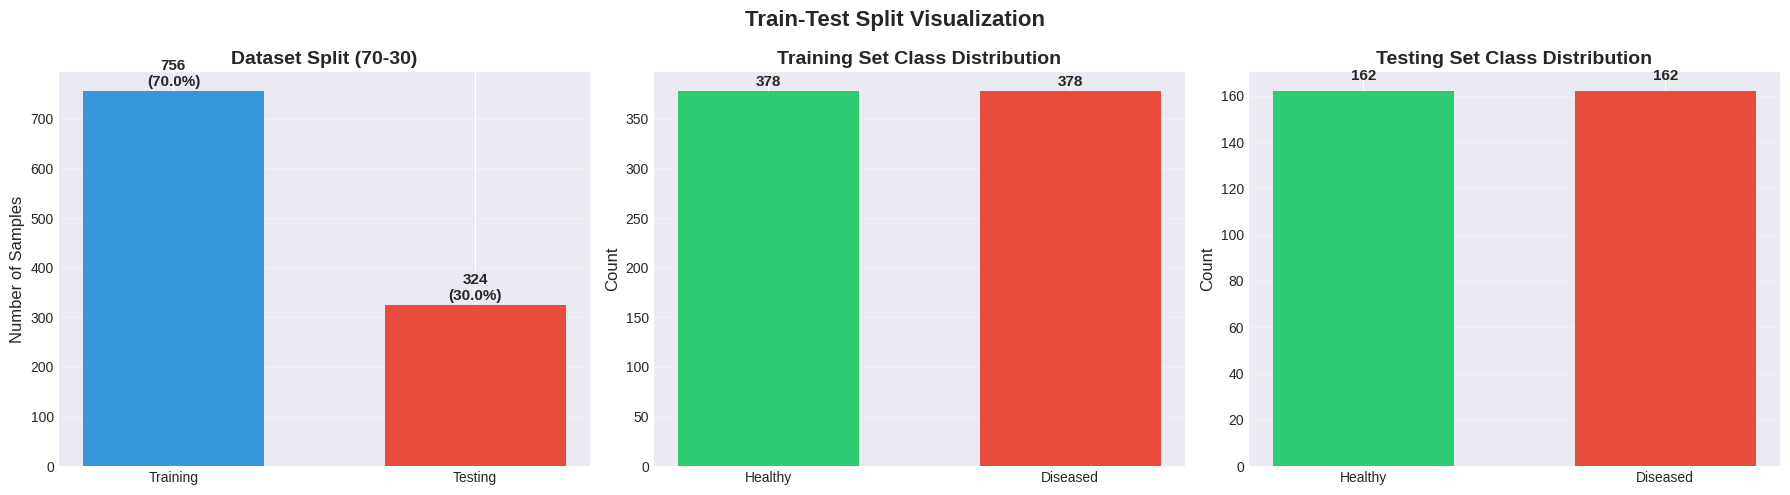

In [ ]:
# 2. TRAIN-TEST SPLIT (70-30)

print(" STEP 1: TRAIN-TEST SPLIT")

# Use the balanced dataset from Phase 1
print(f"\n Dataset Information:")
print(f"   Total Samples: {len(X)}")
print(f"   Features: {X.shape[1]}")
print(f"   Classes: {len(np.unique(y))}")

# Split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y  # Maintain class balance in both sets
)

print(f"\n✅ Data Split Complete!")
print(f"   Training Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Testing Set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distribution in splits
train_class_dist = pd.Series(y_train).value_counts().sort_index()
test_class_dist = pd.Series(y_test).value_counts().sort_index()

print(f"\n Training Set Distribution:")
print(f"   Healthy (0): {train_class_dist[0]} ({train_class_dist[0]/len(y_train)*100:.1f}%)")
print(f"   Diseased (1): {train_class_dist[1]} ({train_class_dist[1]/len(y_train)*100:.1f}%)")

print(f"\n Testing Set Distribution:")
print(f"   Healthy (0): {test_class_dist[0]} ({test_class_dist[0]/len(y_test)*100:.1f}%)")
print(f"   Diseased (1): {test_class_dist[1]} ({test_class_dist[1]/len(y_test)*100:.1f}%)")

# Visualization: Train-Test Split
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Train-Test Split Visualization', fontsize=16, fontweight='bold')

# 1. Size comparison
axes[0].bar(['Training', 'Testing'],
            [len(X_train), len(X_test)],
            color=['#3498db', '#e74c3c'], width=0.6)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Dataset Split (70-30)', fontsize=14, fontweight='bold')
for i, v in enumerate([len(X_train), len(X_test)]):
    axes[0].text(i, v + 10, f'{v}\n({v/len(X)*100:.1f}%)',
                 ha='center', fontweight='bold', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# 2. Training set distribution
axes[1].bar(['Healthy', 'Diseased'], train_class_dist.values,
            color=['#2ecc71', '#e74c3c'], width=0.6)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Training Set Class Distribution', fontsize=14, fontweight='bold')
for i, v in enumerate(train_class_dist.values):
    axes[1].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# 3. Testing set distribution
axes[2].bar(['Healthy', 'Diseased'], test_class_dist.values,
            color=['#2ecc71', '#e74c3c'], width=0.6)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].set_title('Testing Set Class Distribution', fontsize=14, fontweight='bold')
for i, v in enumerate(test_class_dist.values):
    axes[2].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 3. BASELINE MODEL - RANDOM FOREST

print(" STEP 2: TRAINING BASELINE RANDOM FOREST MODEL")


print("\n Model Configuration:")
print("   Algorithm: Random Forest Classifier")
print("   n_estimators: 100 (default)")
print("   random_state: 42")

# Initialize baseline model
rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    verbose=0
)

# Train the model
print("\n Training baseline model...")
start_time = time.time()
rf_baseline.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"✅ Model trained successfully in {training_time:.2f} seconds!")

# Make predictions
y_train_pred = rf_baseline.predict(X_train)
y_test_pred = rf_baseline.predict(X_test)

# Get probability predictions for ROC curve
y_test_proba = rf_baseline.predict_proba(X_test)[:, 1]

 STEP 2: TRAINING BASELINE RANDOM FOREST MODEL

 Model Configuration:
   Algorithm: Random Forest Classifier
   n_estimators: 100 (default)
   random_state: 42

 Training baseline model...
✅ Model trained successfully in 0.30 seconds!


In [ ]:
# 4. BASELINE MODEL EVALUATION

print(" BASELINE MODEL PERFORMANCE")

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"\n Training Set Performance:")
print(f"   Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   Precision: {train_precision:.4f}")
print(f"   Recall:    {train_recall:.4f}")
print(f"   F1-Score:  {train_f1:.4f}")

# Testing metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"\n Testing Set Performance:")
print(f"   Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Precision: {test_precision:.4f}")
print(f"   Recall:    {test_recall:.4f}")
print(f"   F1-Score:  {test_f1:.4f}")
print(f"   ROC-AUC:   {test_roc_auc:.4f}")

# Detailed classification report
print(f"\n Detailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Healthy (0)', 'Diseased (1)'],
                          digits=4))

 BASELINE MODEL PERFORMANCE

 Training Set Performance:
   Accuracy:  1.0000 (100.00%)
   Precision: 1.0000
   Recall:    1.0000
   F1-Score:  1.0000

 Testing Set Performance:
   Accuracy:  0.9969 (99.69%)
   Precision: 0.9939
   Recall:    1.0000
   F1-Score:  0.9969
   ROC-AUC:   1.0000

 Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

 Healthy (0)     1.0000    0.9938    0.9969       162
Diseased (1)     0.9939    1.0000    0.9969       162

    accuracy                         0.9969       324
   macro avg     0.9969    0.9969    0.9969       324
weighted avg     0.9969    0.9969    0.9969       324



 CONFUSION MATRIX ANALYSIS

 Training Confusion Matrix:
[[378   0]
 [  0 378]]

 Testing Confusion Matrix:
[[161   1]
 [  0 162]]


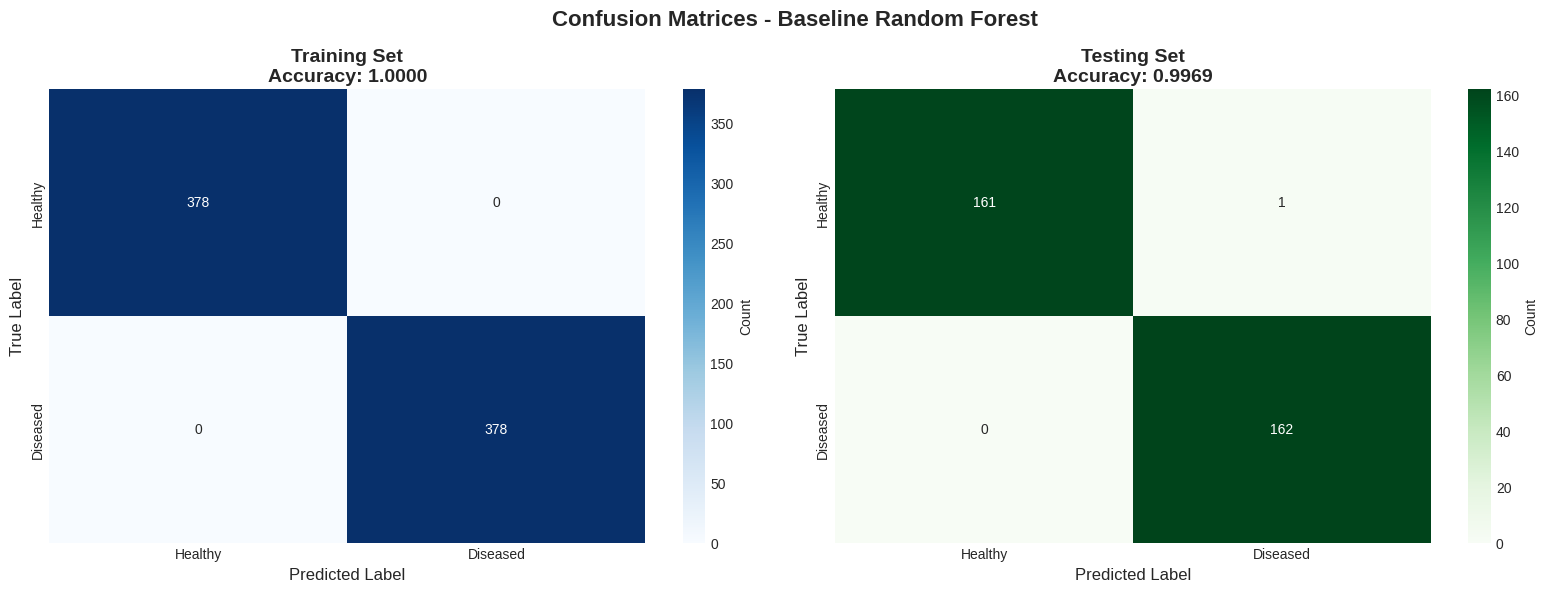


🔍 Confusion Matrix Breakdown (Test Set):
   True Negatives (TN):  161 (Correctly predicted Healthy)
   False Positives (FP): 1 (Healthy predicted as Diseased) ⚠️
   False Negatives (FN): 0 (Diseased predicted as Healthy) ⚠️⚠️
   True Positives (TP):  162 (Correctly predicted Diseased)


In [ ]:
# 5. CONFUSION MATRIX VISUALIZATION

print(" CONFUSION MATRIX ANALYSIS")

# Calculate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print(f"\n Training Confusion Matrix:")
print(cm_train)

print(f"\n Testing Confusion Matrix:")
print(cm_test)

# Visualization: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Confusion Matrices - Baseline Random Forest', fontsize=16, fontweight='bold')

# Training confusion matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Healthy', 'Diseased'],
            yticklabels=['Healthy', 'Diseased'],
            cbar_kws={'label': 'Count'})
axes[0].set_title(f'Training Set\nAccuracy: {train_accuracy:.4f}',
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Testing confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Healthy', 'Diseased'],
            yticklabels=['Healthy', 'Diseased'],
            cbar_kws={'label': 'Count'})
axes[1].set_title(f'Testing Set\nAccuracy: {test_accuracy:.4f}',
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

# Confusion matrix breakdown
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

print(f"\n🔍 Confusion Matrix Breakdown (Test Set):")
print(f"   True Negatives (TN):  {tn_test} (Correctly predicted Healthy)")
print(f"   False Positives (FP): {fp_test} (Healthy predicted as Diseased) ⚠️")
print(f"   False Negatives (FN): {fn_test} (Diseased predicted as Healthy) ⚠️⚠️")
print(f"   True Positives (TP):  {tp_test} (Correctly predicted Diseased)")

 ROC-AUC CURVE ANALYSIS

✅ ROC-AUC Score: 1.0000
 Optimal Threshold: 0.5300


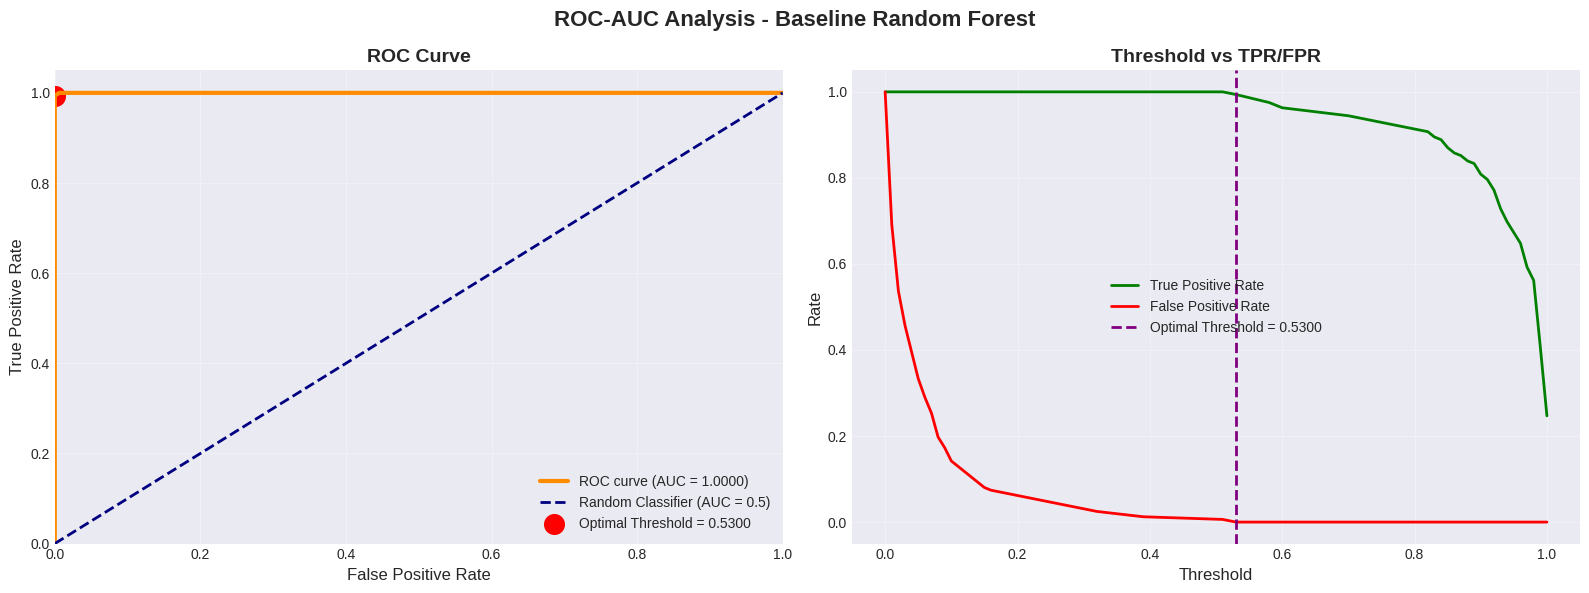

In [ ]:
# 6. ROC-AUC CURVE

print(" ROC-AUC CURVE ANALYSIS")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

print(f"\n✅ ROC-AUC Score: {roc_auc:.4f}")

# Find optimal threshold (Youden's J statistic)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f" Optimal Threshold: {optimal_threshold:.4f}")

# Visualization: ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('ROC-AUC Analysis - Baseline Random Forest', fontsize=16, fontweight='bold')

# ROC Curve
axes[0].plot(fpr, tpr, color='darkorange', lw=3,
             label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
             label='Random Classifier (AUC = 0.5)')
axes[0].scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
                s=200, label=f'Optimal Threshold = {optimal_threshold:.4f}')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0].legend(loc="lower right", fontsize=10)
axes[0].grid(True, alpha=0.3)

# Threshold analysis
axes[1].plot(thresholds, tpr, label='True Positive Rate', color='green', lw=2)
axes[1].plot(thresholds, fpr, label='False Positive Rate', color='red', lw=2)
axes[1].axvline(optimal_threshold, color='purple', linestyle='--', lw=2,
                label=f'Optimal Threshold = {optimal_threshold:.4f}')
axes[1].set_xlabel('Threshold', fontsize=12)
axes[1].set_ylabel('Rate', fontsize=12)
axes[1].set_title('Threshold vs TPR/FPR', fontsize=14, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 FEATURE IMPORTANCE ANALYSIS

 Top 10 Most Important Features:
------------------------------------------------------------


,Feature,Importance
3,AST,0.333885
8,GGT,0.165618
4,BIL,0.124915
1,ALP,0.119622
2,ALT,0.083196
6,CHOL,0.047413
5,CHE,0.035073
9,PROT,0.026293
7,CREA,0.025739
0,ALB,0.022036


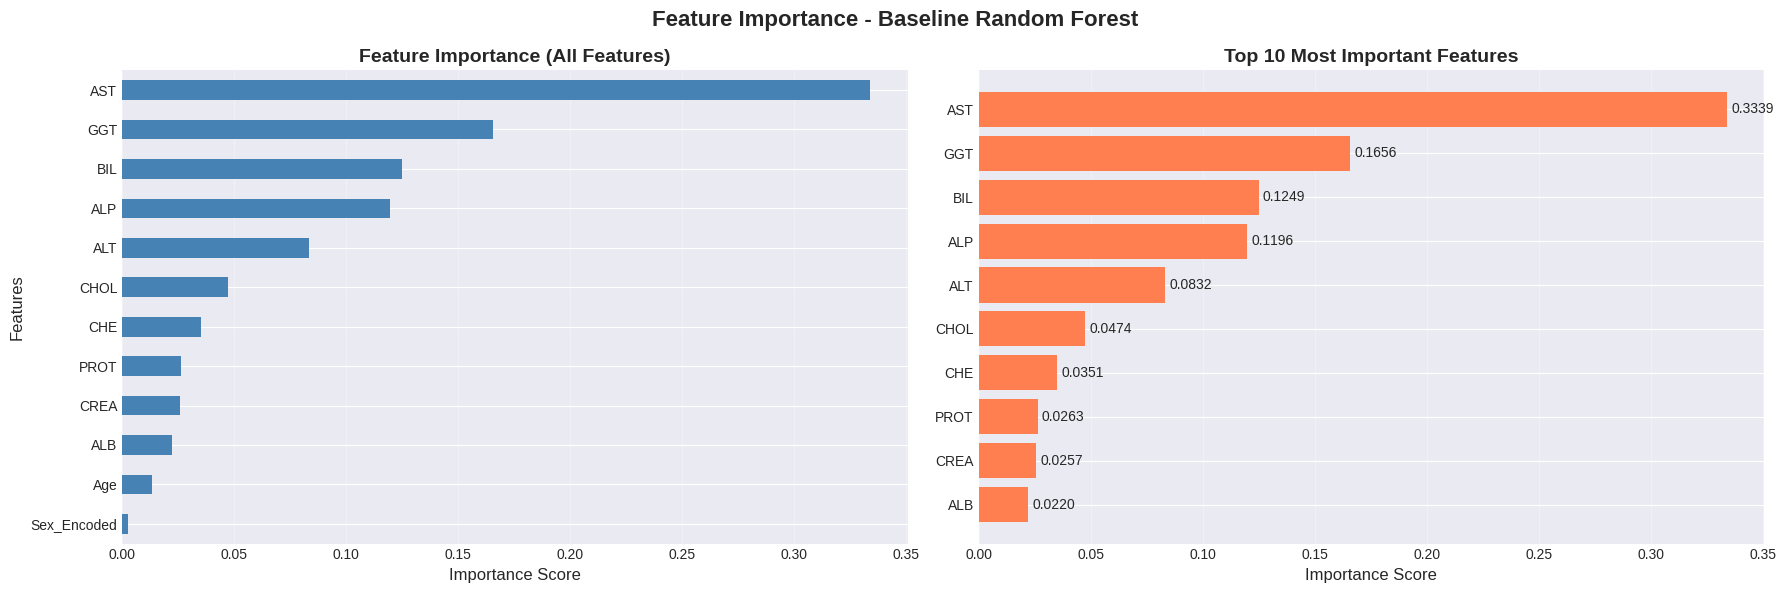

In [ ]:
# 7. FEATURE IMPORTANCE ANALYSIS

print(" FEATURE IMPORTANCE ANALYSIS")

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_baseline.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Top 10 Most Important Features:")
print("-" * 60)
display(feature_importance.head(10))

# Visualization: Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Feature Importance - Baseline Random Forest', fontsize=16, fontweight='bold')

# Bar plot
feature_importance.plot(x='Feature', y='Importance', kind='barh',
                        ax=axes[0], color='steelblue', legend=False)
axes[0].set_xlabel('Importance Score', fontsize=12)
axes[0].set_ylabel('Features', fontsize=12)
axes[0].set_title('Feature Importance (All Features)', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Top 10 features
top_10_features = feature_importance.head(10)
axes[1].barh(top_10_features['Feature'], top_10_features['Importance'],
             color='coral')
axes[1].set_xlabel('Importance Score', fontsize=12)
axes[1].set_title('Top 10 Most Important Features', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_10_features['Importance'].values):
    axes[1].text(v + 0.002, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# 8. HYPERPARAMETER TUNING WITH GRIDSEARCHCV

print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")


print("\n Setting up parameter grid...")

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print(f"\n Parameter Grid:")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

total_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"\n Total combinations to test: {total_combinations}")

# Initialize GridSearchCV
print("\n Starting Grid Search (this may take a few minutes)...")
print("   Using 5-Fold Cross-Validation")

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',  # Optimize for ROC-AUC
    verbose=1,
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
tuning_time = time.time() - start_time

print(f"\n✅ Grid Search Complete in {tuning_time/60:.2f} minutes!")

# Best parameters
print("\n BEST HYPERPARAMETERS FOUND:")
print("-" * 60)
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n Best Cross-Validation ROC-AUC Score: {grid_search.best_score_:.4f}")

# Get the best model
rf_tuned = grid_search.best_estimator_

HYPERPARAMETER TUNING WITH GRIDSEARCHCV

 Setting up parameter grid...

 Parameter Grid:
   n_estimators: [100, 200, 300]
   max_depth: [10, 20, 30, None]
   min_samples_split: [2, 5, 10]
   min_samples_leaf: [1, 2, 4]
   max_features: ['sqrt', 'log2']

 Total combinations to test: 216

 Starting Grid Search (this may take a few minutes)...
   Using 5-Fold Cross-Validation
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Grid Search Complete in 9.72 minutes!

 BEST HYPERPARAMETERS FOUND:
------------------------------------------------------------
   max_depth: 10
   max_features: sqrt
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 100

 Best Cross-Validation ROC-AUC Score: 0.9991


In [ ]:
# 9. TUNED MODEL EVALUATION

print(" TUNED MODEL PERFORMANCE")


# Make predictions with tuned model
y_train_pred_tuned = rf_tuned.predict(X_train)
y_test_pred_tuned = rf_tuned.predict(X_test)
y_test_proba_tuned = rf_tuned.predict_proba(X_test)[:, 1]

# Calculate metrics
train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
train_precision_tuned = precision_score(y_train, y_train_pred_tuned)
train_recall_tuned = recall_score(y_train, y_train_pred_tuned)
train_f1_tuned = f1_score(y_train, y_train_pred_tuned)

test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
test_precision_tuned = precision_score(y_test, y_test_pred_tuned)
test_recall_tuned = recall_score(y_test, y_test_pred_tuned)
test_f1_tuned = f1_score(y_test, y_test_pred_tuned)
test_roc_auc_tuned = roc_auc_score(y_test, y_test_proba_tuned)

print(f"\n🏋️ Training Set Performance:")
print(f"   Accuracy:  {train_accuracy_tuned:.4f} ({train_accuracy_tuned*100:.2f}%)")
print(f"   Precision: {train_precision_tuned:.4f}")
print(f"   Recall:    {train_recall_tuned:.4f}")
print(f"   F1-Score:  {train_f1_tuned:.4f}")

print(f"\n🎯 Testing Set Performance:")
print(f"   Accuracy:  {test_accuracy_tuned:.4f} ({test_accuracy_tuned*100:.2f}%)")
print(f"   Precision: {test_precision_tuned:.4f}")
print(f"   Recall:    {test_recall_tuned:.4f}")
print(f"   F1-Score:  {test_f1_tuned:.4f}")
print(f"   ROC-AUC:   {test_roc_auc_tuned:.4f}")

 TUNED MODEL PERFORMANCE

🏋️ Training Set Performance:
   Accuracy:  1.0000 (100.00%)
   Precision: 1.0000
   Recall:    1.0000
   F1-Score:  1.0000

🎯 Testing Set Performance:
   Accuracy:  0.9907 (99.07%)
   Precision: 0.9938
   Recall:    0.9877
   F1-Score:  0.9907
   ROC-AUC:   0.9999



⚖️ BASELINE VS TUNED MODEL COMPARISON

📊 Performance Comparison (Test Set):
--------------------------------------------------------------------------------


,Metric,Baseline,Tuned,Improvement
0,Accuracy,0.996914,0.990741,-0.619195
1,Precision,0.993865,0.993789,-0.007668
2,Recall,1.000000,0.987654,-1.234568
3,F1-Score,0.996923,0.990712,-0.623017
4,ROC-AUC,0.999981,0.999886,-0.009526


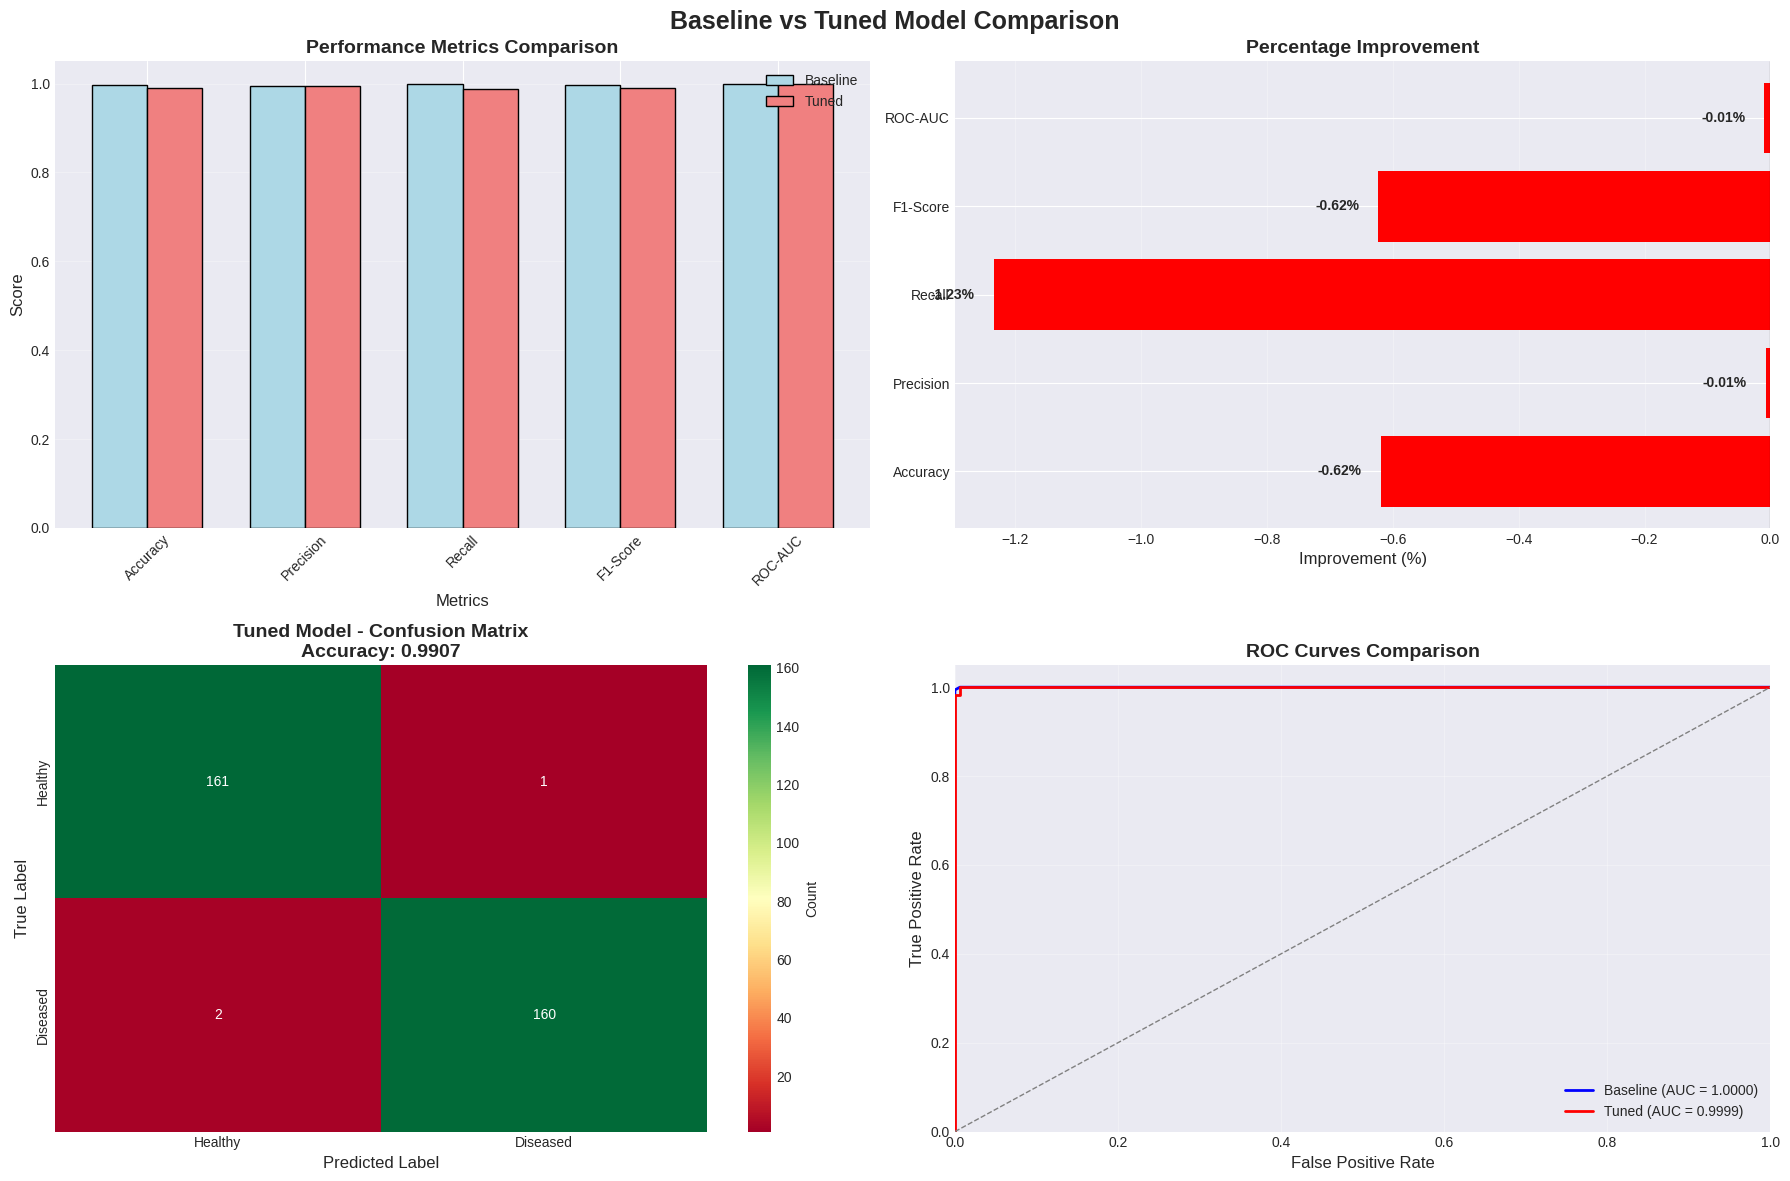

In [ ]:
# 10. BASELINE VS TUNED COMPARISON
# -----------------------------

print("\n" + "=" * 80)
print("⚖️ BASELINE VS TUNED MODEL COMPARISON")
print("=" * 80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Baseline': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc],
    'Tuned': [test_accuracy_tuned, test_precision_tuned, test_recall_tuned,
              test_f1_tuned, test_roc_auc_tuned]
})

comparison_df['Improvement'] = ((comparison_df['Tuned'] - comparison_df['Baseline'])
                                / comparison_df['Baseline'] * 100)

print("\n📊 Performance Comparison (Test Set):")
print("-" * 80)
display(comparison_df)

# Visualization: Baseline vs Tuned
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Baseline vs Tuned Model Comparison', fontsize=18, fontweight='bold')

# 1. Metrics comparison
x = np.arange(len(comparison_df['Metric']))
width = 0.35

axes[0, 0].bar(x - width/2, comparison_df['Baseline'], width,
               label='Baseline', color='lightblue', edgecolor='black')
axes[0, 0].bar(x + width/2, comparison_df['Tuned'], width,
               label='Tuned', color='lightcoral', edgecolor='black')
axes[0, 0].set_xlabel('Metrics', fontsize=12)
axes[0, 0].set_ylabel('Score', fontsize=12)
axes[0, 0].set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(comparison_df['Metric'], rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Improvement percentage
colors = ['green' if x >= 0 else 'red' for x in comparison_df['Improvement']]
axes[0, 1].barh(comparison_df['Metric'], comparison_df['Improvement'], color=colors)
axes[0, 1].set_xlabel('Improvement (%)', fontsize=12)
axes[0, 1].set_title('Percentage Improvement', fontsize=14, fontweight='bold')
axes[0, 1].axvline(0, color='black', linewidth=0.8)
axes[0, 1].grid(axis='x', alpha=0.3)

for i, v in enumerate(comparison_df['Improvement']):
    axes[0, 1].text(v + 0.1 if v >= 0 else v - 0.1, i, f'{v:.2f}%',
                    va='center', fontsize=10, fontweight='bold')

# 3. Confusion Matrix - Tuned Model
cm_test_tuned = confusion_matrix(y_test, y_test_pred_tuned)
sns.heatmap(cm_test_tuned, annot=True, fmt='d', cmap='RdYlGn', ax=axes[1, 0],
            xticklabels=['Healthy', 'Diseased'],
            yticklabels=['Healthy', 'Diseased'],
            cbar_kws={'label': 'Count'})
axes[1, 0].set_title(f'Tuned Model - Confusion Matrix\nAccuracy: {test_accuracy_tuned:.4f}',
                     fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('True Label', fontsize=12)
axes[1, 0].set_xlabel('Predicted Label', fontsize=12)

# 4. ROC Curves comparison
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_test_proba_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

axes[1, 1].plot(fpr, tpr, color='blue', lw=2,
                label=f'Baseline (AUC = {roc_auc:.4f})')
axes[1, 1].plot(fpr_tuned, tpr_tuned, color='red', lw=2,
                label=f'Tuned (AUC = {roc_auc_tuned:.4f})')
axes[1, 1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[1, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[1, 1].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[1, 1].legend(loc="lower right")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 12. SAVE THE TRAINED MODELS
# -----------------------------

print("\n" + "=" * 80)
print("💾 STEP 4: SAVING TRAINED MODELS")
print("=" * 80)

# Create timestamp for version control
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save baseline model
baseline_filename = f'hepatitis_rf_baseline_{timestamp}.pkl'
joblib.dump(rf_baseline, baseline_filename)
print(f"\n✅ Baseline Model Saved: {baseline_filename}")

# Save tuned model
tuned_filename = f'hepatitis_rf_tuned_{timestamp}.pkl'
joblib.dump(rf_tuned, tuned_filename)
print(f"✅ Tuned Model Saved: {tuned_filename}")

# Save feature names
feature_filename = f'feature_names_{timestamp}.pkl'
joblib.dump(feature_columns, feature_filename)
print(f"✅ Feature Names Saved: {feature_filename}")

# Save scaler (if you want to use it later)
# Note: Random Forest doesn't require scaling, but saving for consistency
print(f"\n📦 Model Files Created:")
print(f"   1. {baseline_filename}")
print(f"   2. {tuned_filename}")
print(f"   3. {feature_filename}")

# Download models (optional - for Colab)
from google.colab import files
print(f"\n📥 Do you want to download the models? (They're also saved in session)")

# Uncomment below to auto-download
files.download(baseline_filename)
# files.download(tuned_filename)
# files.download(feature_filename)


💾 STEP 4: SAVING TRAINED MODELS

✅ Baseline Model Saved: hepatitis_rf_baseline_20251109_164216.pkl
✅ Tuned Model Saved: hepatitis_rf_tuned_20251109_164216.pkl
✅ Feature Names Saved: feature_names_20251109_164216.pkl

📦 Model Files Created:
   1. hepatitis_rf_baseline_20251109_164216.pkl
   2. hepatitis_rf_tuned_20251109_164216.pkl
   3. feature_names_20251109_164216.pkl

📥 Do you want to download the models? (They're also saved in session)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Phase 3: Demonstrate Black Box Problem

In [ ]:
# 1. MAKE PREDICTIONS ON TEST SET

print("🔮 STEP 1: MAKING PREDICTIONS WITH BASELINE MODEL")

# Use baseline model (intentionally to show black box nature)
print("\n Using Baseline Random Forest Model (Black Box)")
print(f"   Test Set Size: {len(X_test)} patients")

# Get predictions and probabilities
y_pred_blackbox = rf_baseline.predict(X_test)
y_proba_blackbox = rf_baseline.predict_proba(X_test)

# Create results dataframe
results_df = pd.DataFrame({
    'Patient_ID': range(1, len(X_test) + 1),
    'True_Label': y_test.values,
    'Predicted_Label': y_pred_blackbox,
    'Confidence_Healthy': y_proba_blackbox[:, 0] * 100,
    'Confidence_Diseased': y_proba_blackbox[:, 1] * 100,
    'Correct': (y_test.values == y_pred_blackbox)
})

# Add interpretation
results_df['True_Status'] = results_df['True_Label'].map({0: 'Healthy', 1: 'Diseased'})
results_df['Predicted_Status'] = results_df['Predicted_Label'].map({0: 'Healthy', 1: 'Diseased'})

print(f"\n✅ Predictions Complete!")
print(f"   Correct Predictions: {results_df['Correct'].sum()} ({results_df['Correct'].sum()/len(results_df)*100:.1f}%)")
print(f"   Incorrect Predictions: {(~results_df['Correct']).sum()} ({(~results_df['Correct']).sum()/len(results_df)*100:.1f}%)")

# Preview results
print(f"\n Sample Predictions:")
display(results_df.head(10))

🔮 STEP 1: MAKING PREDICTIONS WITH BASELINE MODEL

 Using Baseline Random Forest Model (Black Box)
   Test Set Size: 324 patients

✅ Predictions Complete!
   Correct Predictions: 323 (99.7%)
   Incorrect Predictions: 1 (0.3%)

 Sample Predictions:


,Patient_ID,True_Label,Predicted_Label,Confidence_Healthy,Confidence_Diseased,Correct,True_Status,Predicted_Status
0,1,1,1,1.0,99.0,True,Diseased,Diseased
1,2,1,1,11.0,89.0,True,Diseased,Diseased
2,3,1,1,2.0,98.0,True,Diseased,Diseased
3,4,0,0,91.0,9.0,True,Healthy,Healthy
4,5,1,1,10.0,90.0,True,Diseased,Diseased
5,6,0,0,100.0,0.0,True,Healthy,Healthy
6,7,1,1,19.0,81.0,True,Diseased,Diseased
7,8,0,0,88.0,12.0,True,Healthy,Healthy
8,9,0,0,100.0,0.0,True,Healthy,Healthy
9,10,1,1,2.0,98.0,True,Diseased,Diseased


In [ ]:
# 2. IDENTIFY INTERESTING CASES

print(" STEP 2: IDENTIFYING INTERESTING BLACK BOX CASES")

# Case 1: High confidence DISEASED predictions (correct)
diseased_high_conf = results_df[
    (results_df['Predicted_Label'] == 1) &
    (results_df['Confidence_Diseased'] > 85) &
    (results_df['Correct'] == True)
].head(3)

# Case 2: High confidence HEALTHY predictions (correct)
healthy_high_conf = results_df[
    (results_df['Predicted_Label'] == 0) &
    (results_df['Confidence_Healthy'] > 85) &
    (results_df['Correct'] == True)
].head(3)

# Case 3: Wrong predictions (False Positives - Healthy predicted as Diseased)
false_positives = results_df[
    (results_df['True_Label'] == 0) &
    (results_df['Predicted_Label'] == 1)
].head(2)

# Case 4: Wrong predictions (False Negatives - Diseased predicted as Healthy) - CRITICAL!
false_negatives = results_df[
    (results_df['True_Label'] == 1) &
    (results_df['Predicted_Label'] == 0)
].head(2)

# Case 5: Low confidence predictions (uncertain cases)
uncertain_cases = results_df[
    (results_df['Confidence_Diseased'] > 45) &
    (results_df['Confidence_Diseased'] < 55)
].head(2)

print(f"\n📊 Interesting Cases Identified:")
print(f"   ✅ High Confidence Diseased: {len(diseased_high_conf)} cases")
print(f"   ✅ High Confidence Healthy: {len(healthy_high_conf)} cases")
print(f"   ⚠️  False Positives: {len(false_positives)} cases")
print(f"   ⚠️⚠️ False Negatives: {len(false_negatives)} cases (CRITICAL!)")
print(f"   ❓ Uncertain Cases: {len(uncertain_cases)} cases")

 STEP 2: IDENTIFYING INTERESTING BLACK BOX CASES

📊 Interesting Cases Identified:
   ✅ High Confidence Diseased: 3 cases
   ✅ High Confidence Healthy: 3 cases
   ⚠️  False Positives: 1 cases
   ⚠️⚠️ False Negatives: 0 cases (CRITICAL!)
   ❓ Uncertain Cases: 2 cases



🚀 PHASE 3: BLACK BOX PROBLEM DEMONSTRATION (FIXED)

✅ Predictions done! Accuracy: 99.69%


,Patient_ID,True_Label,Predicted_Label,Confidence_Healthy,Confidence_Diseased,Correct,True_Status,Predicted_Status
1020,1,1,1,1.0,99.0,True,Diseased,Diseased
685,2,1,1,11.0,89.0,True,Diseased,Diseased
814,3,1,1,2.0,98.0,True,Diseased,Diseased
263,4,0,0,91.0,9.0,True,Healthy,Healthy
614,5,1,1,10.0,90.0,True,Diseased,Diseased
343,6,0,0,100.0,0.0,True,Healthy,Healthy
975,7,1,1,19.0,81.0,True,Diseased,Diseased
205,8,0,0,88.0,12.0,True,Healthy,Healthy
409,9,0,0,100.0,0.0,True,Healthy,Healthy
944,10,1,1,2.0,98.0,True,Diseased,Diseased



📊 Interesting cases identified:
High Confidence Diseased: 3
High Confidence Healthy: 3
False Positives: 1
False Negatives: 0
Uncertain Cases: 2

📋 CASE 1: High Confidence DISEASED (Correct)
🏥 Patient ID (display): 1  |  Row label (index): 1020
True Status: Diseased  |  Predicted: Diseased  |  Confidence: 99.0%
Sex: Female  |  Age: 48

🩺 Blood Test Results (we show values but we DON'T know feature importance):
  ALB   :   42.60   ???
  ALP   :   31.16   ???
  ALT   :   21.33   ???
  AST   :  130.46   ???
  BIL   :   15.03   ???
  CHE   :    6.81   ???
  CHOL  :    4.00   ???
  CREA  :   59.52   ???
  GGT   :   67.28   ???
  PROT  :   74.66   ???

❓ BLACK BOX REMARK: Model gives prediction but no explanation of which markers drove it.


📋 CASE 2: High Confidence HEALTHY (Correct)
🏥 Patient ID (display): 4  |  Row label (index): 263
True Status: Healthy  |  Predicted: Healthy  |  Confidence: 91.0%
Sex: Male  |  Age: 58

🩺 Blood Test Results (we show values but we DON'T know feature impor

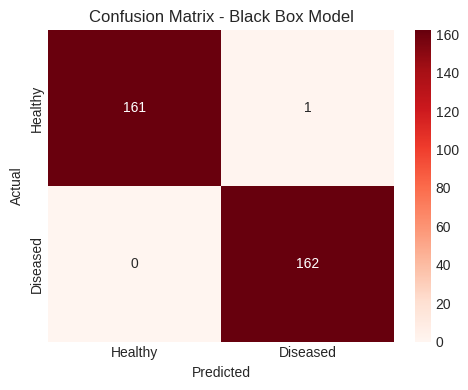


💾 Saved interesting cases for SHAP/LIME analysis (interesting_cases.pkl).


In [ ]:
# PHASE 3: DEMONSTRATE BLACK BOX PROBLEM (FIXED INDEX MISMATCH)

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd


print(" PHASE 3: BLACK BOX PROBLEM DEMONSTRATION (FIXED)")


# 1) MAKE PREDICTIONS (assumes rf_baseline, X_test, y_test are defined)
y_pred_blackbox = rf_baseline.predict(X_test)
y_proba_blackbox = rf_baseline.predict_proba(X_test)

results_df = pd.DataFrame({
    'Patient_ID': range(1, len(X_test) + 1),
    'True_Label': y_test.values,
    'Predicted_Label': y_pred_blackbox,
    'Confidence_Healthy': y_proba_blackbox[:, 0] * 100,
    'Confidence_Diseased': y_proba_blackbox[:, 1] * 100
}, index=X_test.index)

results_df['Correct'] = results_df['True_Label'] == results_df['Predicted_Label']
results_df['True_Status'] = results_df['True_Label'].map({0: 'Healthy', 1: 'Diseased'})
results_df['Predicted_Status'] = results_df['Predicted_Label'].map({0: 'Healthy', 1: 'Diseased'})

print(f"\n✅ Predictions done! Accuracy: {results_df['Correct'].mean()*100:.2f}%")
display(results_df.head(10))

#2) IDENTIFY INTERESTING CASES
diseased_high_conf = results_df[(results_df['Predicted_Label']==1) &
                                (results_df['Confidence_Diseased']>85) &
                                (results_df['Correct']==True)].head(3)

healthy_high_conf = results_df[(results_df['Predicted_Label']==0) &
                               (results_df['Confidence_Healthy']>85) &
                               (results_df['Correct']==True)].head(3)

false_positives = results_df[(results_df['True_Label']==0) &
                             (results_df['Predicted_Label']==1)].head(2)

false_negatives = results_df[(results_df['True_Label']==1) &
                             (results_df['Predicted_Label']==0)].head(2)

uncertain_cases = results_df[(results_df['Confidence_Diseased']>45) &
                             (results_df['Confidence_Diseased']<55)].head(2)

print("\n Interesting cases identified:")
print(f"High Confidence Diseased: {len(diseased_high_conf)}")
print(f"High Confidence Healthy: {len(healthy_high_conf)}")
print(f"False Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")
print(f"Uncertain Cases: {len(uncertain_cases)}")

# 3) DISPLAY FUNCTION (robust)
def display_black_box_case(case_row, case_number, case_type):
    # case_row is a one-row DataFrame whose index label matches X_test
    patient_idx = case_row.index[0]
    patient_data = X_test.loc[patient_idx]

    true_status = case_row['True_Status'].values[0]
    pred_status = case_row['Predicted_Status'].values[0]
    conf_diseased = float(case_row['Confidence_Diseased'].values[0])
    conf_healthy = float(case_row['Confidence_Healthy'].values[0])
    confidence = conf_diseased if pred_status == 'Diseased' else conf_healthy


    print(f" CASE {case_number}: {case_type}")

    print(f"Patient ID (display): {int(case_row['Patient_ID'].values[0])}  |  Row label (index): {patient_idx}")
    print(f"True Status: {true_status}  |  Predicted: {pred_status}  |  Confidence: {confidence:.1f}%")
    # Sex handling: accept either 'Sex_Encoded' or 'Sex' presence
    if 'Sex_Encoded' in patient_data:
        sex_text = 'Male' if int(patient_data['Sex_Encoded']) == 1 else 'Female'
    elif 'Sex' in patient_data:
        sex_text = patient_data['Sex']
    else:
        sex_text = 'Unknown'
    age_text = int(patient_data['Age']) if 'Age' in patient_data else 'Unknown'
    print(f"Sex: {sex_text}  |  Age: {age_text}")

    print("\n🩺 Blood Test Results (we show values but we DON'T know feature importance):")
    markers = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']
    for marker in markers:
        if marker in patient_data:
            print(f"  {marker:<6}: {patient_data[marker]:>7.2f}   ???")
        else:
            print(f"  {marker:<6}: {'N/A':>7}   ???")

    print("\n BLACK BOX REMARK: Model gives prediction but no explanation of which markers drove it.\n")
    return patient_idx, patient_data

# Show one example for each category if present
if len(diseased_high_conf) > 0:
    display_black_box_case(diseased_high_conf.iloc[[0]], 1, "High Confidence DISEASED (Correct)")
if len(healthy_high_conf) > 0:
    display_black_box_case(healthy_high_conf.iloc[[0]], 2, "High Confidence HEALTHY (Correct)")
if len(false_positives) > 0:
    display_black_box_case(false_positives.iloc[[0]], 3, "False Positive (Healthy→Diseased)")
if len(false_negatives) > 0:
    display_black_box_case(false_negatives.iloc[[0]], 4, "False Negative (Diseased→Healthy)")
if len(uncertain_cases) > 0:
    display_black_box_case(uncertain_cases.iloc[[0]], 5, "Uncertain Prediction (Low Confidence)")

# 4) SIMPLE VISUALIZATION
cm = confusion_matrix(y_test, y_pred_blackbox)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Healthy','Diseased'], yticklabels=['Healthy','Diseased'])
plt.title("Confusion Matrix - Black Box Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 5) SAVE INTERESTING CASES FOR NEXT PHASE
interesting_cases = {
    'diseased_high_conf': diseased_high_conf.index.tolist(),
    'healthy_high_conf': healthy_high_conf.index.tolist(),
    'false_positives': false_positives.index.tolist(),
    'false_negatives': false_negatives.index.tolist(),
    'uncertain_cases': uncertain_cases.index.tolist()
}
with open('interesting_cases.pkl', 'wb') as f:
    pickle.dump(interesting_cases, f)

print("\n Saved interesting cases for SHAP/LIME analysis (interesting_cases.pkl).")


Phase 4: SHAP Explanations

In [ ]:
# 1. INSTALL & IMPORT SHAP

print("\n Installing SHAP library...")
!pip install -q shap

import shap
import pickle

print(" SHAP library imported successfully!")
print(f"   SHAP Version: {shap.__version__}")

# Initialize JavaScript for interactive plots
shap.initjs()

# Load interesting cases from Phase 3
with open('interesting_cases.pkl', 'rb') as f:
    interesting_cases = pickle.load(f)

print("\n Loaded interesting cases from Phase 3")


 Installing SHAP library...
 SHAP library imported successfully!
   SHAP Version: 0.49.1



 Loaded interesting cases from Phase 3



🚀 PHASE 4: SHAP EXPLANATIONS - OPENING THE BLACK BOX!


✅ Loaded interesting cases from Phase 3
✅ SHAP values computed in 0.52 seconds!
📍 Base Value (Expected Value): 0.4997

🏆 TOP 10 MOST IMPORTANT FEATURES (Global):
  Feature  Mean_Abs_SHAP
3     AST       0.186630
8     GGT       0.092761
4     BIL       0.077758
1     ALP       0.075712
2     ALT       0.047015
6    CHOL       0.027770
5     CHE       0.016257
7    CREA       0.013256
9    PROT       0.010560
0     ALB       0.006981


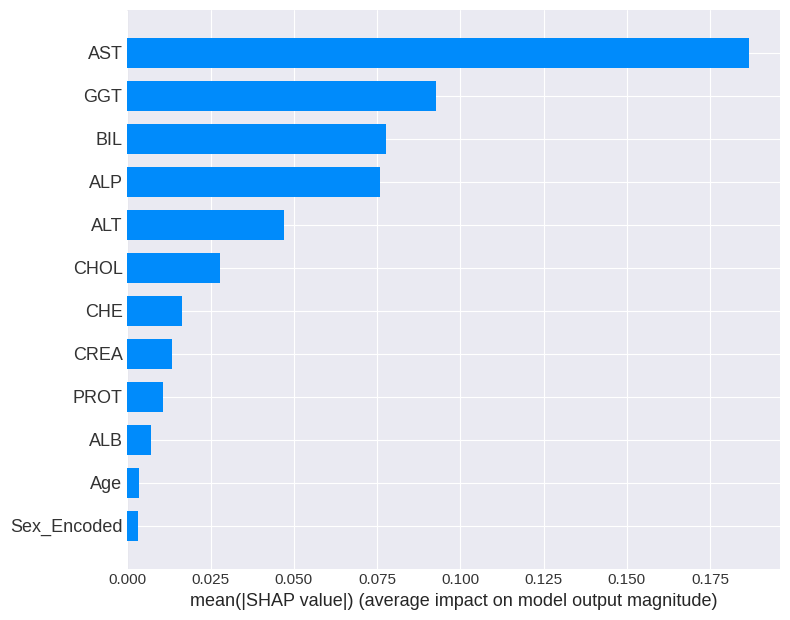


👤 CASE 1: High Confidence DISEASED (Correct)
🏥 Patient ID: 1020
   Base Value: 0.4997
   SHAP sum: 0.4903
   Final prediction: 0.9900


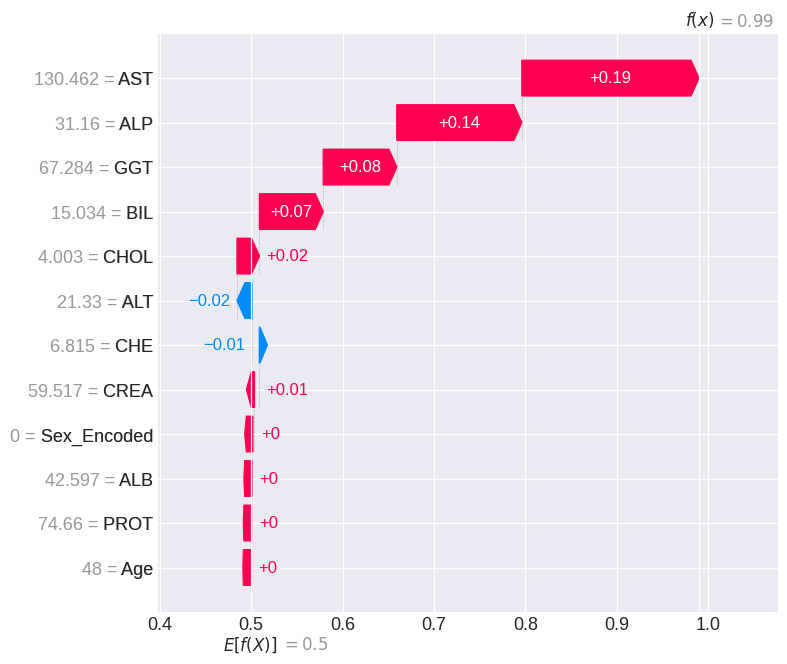

In [ ]:

# PHASE 4: SHAP EXPLANATIONS - OPENING THE BLACK BOX


import shap
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

print("\n🚀 PHASE 4: SHAP EXPLANATIONS - OPENING THE BLACK BOX!")
shap.initjs()


with open('interesting_cases.pkl', 'rb') as f:
    interesting_cases = pickle.load(f)

print("✅ Loaded interesting cases from Phase 3")

explainer = shap.TreeExplainer(rf_baseline)

start_time = time.time()
shap_values = explainer.shap_values(X_test)
computation_time = time.time() - start_time
print(f"✅ SHAP values computed in {computation_time:.2f} seconds!")


# If shap_values is a list (binary classification), select class 1
if isinstance(shap_values, list):
    shap_values_diseased = np.array(shap_values[1])
else:
    shap_values_diseased = np.array(shap_values)

# If 3D, select class 1 along last axis
if shap_values_diseased.ndim == 3:
    # (n_samples, n_features, n_classes) → pick class 1
    shap_values_diseased = shap_values_diseased[:, :, 1]

# Ensure 2D now
shap_values_diseased = shap_values_diseased.squeeze()
if shap_values_diseased.ndim != 2:
    raise ValueError(f"SHAP values should be 2D now, got shape {shap_values_diseased.shape}")

# Expected value (baseline)
expected_value = explainer.expected_value
if isinstance(expected_value, (list, np.ndarray)):
    expected_value = float(np.array(expected_value)[1].squeeze())
else:
    expected_value = float(expected_value)
print(f"📍 Base Value (Expected Value): {expected_value:.4f}")


mean_abs_shap = np.abs(shap_values_diseased).mean(axis=0)

# Check feature count
if len(feature_columns) != mean_abs_shap.shape[0]:
    raise ValueError(f"Number of features ({len(feature_columns)}) does not match SHAP features ({mean_abs_shap.shape[0]})")

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values('Mean_Abs_SHAP', ascending=False)

print("\n🏆 TOP 10 MOST IMPORTANT FEATURES (Global):")
print(feature_importance_df.head(10))

# SHAP summary plot
shap.summary_plot(shap_values_diseased, X_test, plot_type="bar", show=True)

def explain_patient_shap(patient_idx_in_results, case_title, case_number):
    patient_data = X_test.iloc[patient_idx_in_results]
    test_idx = X_test.index.get_loc(patient_data.name)
    patient_shap = shap_values_diseased[test_idx, :]

    print(f"\n👤 CASE {case_number}: {case_title}")
    print(f"🏥 Patient ID: {patient_data.name}")
    print(f"   Base Value: {expected_value:.4f}")
    print(f"   SHAP sum: {patient_shap.sum():.4f}")
    print(f"   Final prediction: {expected_value + patient_shap.sum():.4f}")

    # SHAP Waterfall
    shap_explanation = shap.Explanation(
        values=patient_shap,
        base_values=expected_value,
        data=patient_data.values,
        feature_names=feature_columns
    )
    shap.plots.waterfall(shap_explanation, max_display=12)


# Example: first high-confidence diseased
if len(interesting_cases['diseased_high_conf']) > 0:
    explain_patient_shap(0, "High Confidence DISEASED (Correct)", 1)
